<h1>Import libraries<h1>

In [1]:
from Methods.Chi_Square import *
from Methods.VIF import *
from Methods.ANOVA import *
from Methods.Jarque_Bera import *
from Methods.Levene import *
from Methods.Kruskal_Wallis import *
from Methods.Pearson_Correlation import *
from Methods.Spearman_Correlation import *
from Methods.Hoeffding import *
from Methods.Linear_Discriminant_Analysis import *
from Methods.PCA import *
from Methods.Kernel_PCA import *
from Methods.Factor_Analysis import *
from Methods.KMO import *
from Methods.Bartlett_sphercity import *
from Methods.SVD import SVD
from Methods.TSNE import *
from Methods.NNMF import *
from Plots.Preprocessing_plots import Preprocessing_plots
Plots_preprocessing = Preprocessing_plots()
from Plots.Other_plots import Other_Plots
Other_plots = Other_Plots()

$\text{Since some methods examine relationships only between specific types of data,}$<p>
$\text{two sets will be downloaded (with a continuous and categorical target variable).}$

<h2>Download data<h2>

In [2]:
data_classification = pd.read_csv("Data/bank-balanced.csv")
data_classification

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
data_regression = pd.read_csv("Data/house_prices.csv")
data_regression.drop(["id", "date", "zipcode"], axis=1, inplace=True)
data_regression

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


<h2>Check for null data<h2>

In [4]:
data_classification.isnull().sum()/len(data_classification)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [5]:
data_regression.isnull().sum()/len(data_regression)

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

$\text{Fortunately, our data does not contain any missing values.}$<p>
$\text{Check at the distribution of target variable in the regression dataset to find out whether there are any outliers.}$<p>

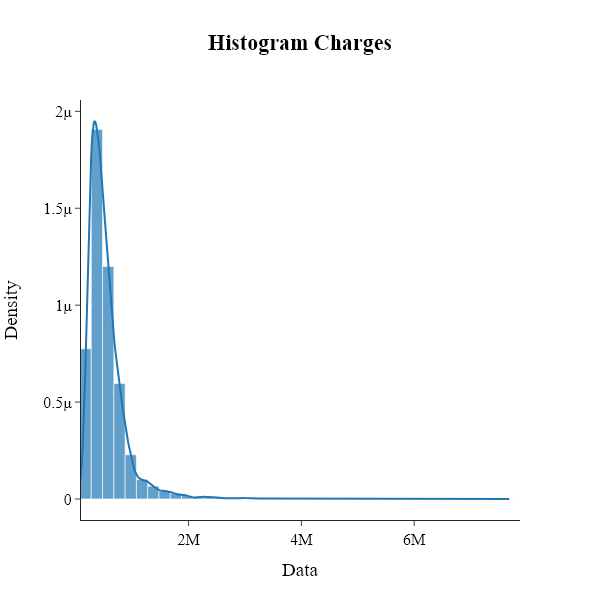

In [6]:
Plots_preprocessing.hist_plot_with_kde(data=data_regression["price"], name="charges", bin_size=200000)

$\text{As we can see the target variable contains high values and distribution is pretty skewed.}$<p>
$\text{We will use Logarithm Transformation for that.}$<p>

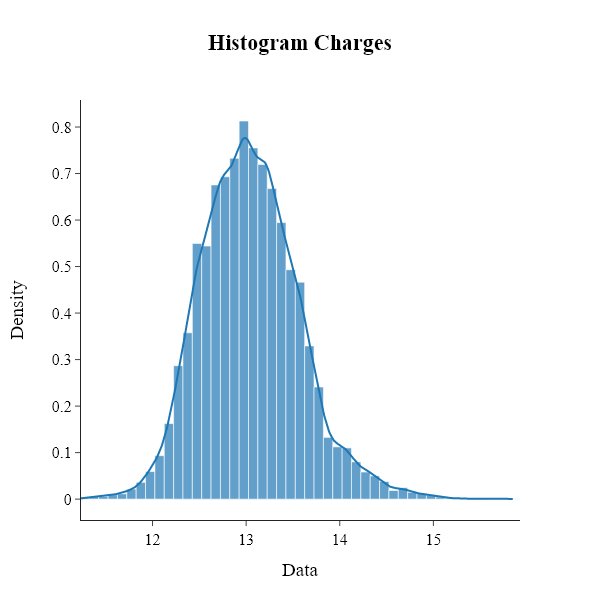

In [7]:
data_regression["price"] = np.log(data_regression["price"])
Plots_preprocessing.hist_plot_with_kde(data=data_regression["price"], name="charges", bin_size=0.1)

$\text{Okay, it looks much better now.}$

$\text{At this stage, it is worth examining whether the dataset contains redundant data.}$<p>
$\text{Before that, define categorical and continous features in our datasets.}$<p>
$\text{We will also transform object columns to numerical, because some methods just do not accept character values.}$

In [8]:
data_classification

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [9]:
list_of_categorical_classification = data_classification.select_dtypes(include="object").columns.tolist()
encoder = OrdinalEncoder()
data_classification[list_of_categorical_classification] = encoder.fit_transform(data_classification[list_of_categorical_classification])
target_classification = "deposit"
list_of_categorical_classification.remove(target_classification)
X_classification = data_classification.drop(target_classification, axis=1)
y_classification = data_classification[target_classification]

In [10]:
list_of_categorical_regression = data_regression.select_dtypes(include="object").columns.tolist()
list_of_categorical_regression

[]

$\text{As we can see our regression data does not contain any object columns based on above cell code.}$<p>
$\text{However, if we dig a little deeper into the dataset, we can find several categorical variables based on histograms or value\_counts().}$<p>
$\text{For instance feature } bedrooms:$

In [11]:
data_regression["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

$\text{After the analysis, the following variables were detected:}$

In [12]:
list_of_categorical_regression = ["bedrooms", "bathrooms", "floors", "waterfront", "view", "condition", "grade"]
encoder = OrdinalEncoder()
data_regression[list_of_categorical_regression] = encoder.fit_transform(data_regression[list_of_categorical_regression])
target_regression = "price"
X_regression = data_regression.drop(target_regression, axis=1)
y_regression = data_regression[target_regression]

<h2>Explenation of Redundant Data<h2>

$\text{Data redundancy occurs when the same piece of data is stored in two or more separate columns.}$<p>
$\text{For a linear regression example, this can be compared with copy or highly correlated variables, which can be verified using the VIF statistic.}$<p>
$\text{Redundant data can degrade model performance, or increase computation time.}$<p>
$\text{Since in multidimensional sets, identifying significant features is more difficult than finding redundant data,}$<p>
$\text{it is a good strategy to reduce redundancy first and then deal with relevance.}$<p>
$\text{The main goal of the process of removing redundant data is to reduce the dimensionality of the set and get rid of the curse of dimensionality problem (or possibly reduce it).}$

<h1>Statistical methods<h1>

$\text{For all statistical models, significance level will be equal to 0.05.}$

<h2>Chi-Square Test<h2>

$\textbf{Assumptions:}$<p>
$\text{- The variables tested are categorical,}$<p>
$\text{- The expected value of the cells should be >5 for at least 80\% of the cells,}$<p>
$\text{because otherwise the calculated value of } \chi^2 \text{ may not be correct.}$<p><br>
$\textbf{Hypotheses:}$<p>
$H_0 \text{: The variables are independent (no association between variables).}$<p>
$H_1 \text{: The variables are dependent (association between variables is present).}$<p>
$\textbf{Test statistic:}$<p>
$$\chi^2=\sum_{r=1}^{R}\sum_{c=1}^{C}\frac{\left(X_{r,c}-\frac{\sum_{r=1}^{R}X_r\times\sum_{c=1}^{C}X_c}{\sum_{r=1}^{R}\sum_{c=1}^{C}X_{r, c}}\right)^2}{\frac{\sum_{r=1}^{R}X_r\times\sum_{c=1}^{C}X_c}{\sum_{r=1}^{R}\sum_{c=1}^{C}X_{r,c}}} \sim \chi^2(\left(R-1\right)\times\left(C-1\right))$$
$\text{Where: } R \text{ - number of categories for variable 1 (number of rows in the cross table),}$<p>
$C \text{ - number of categories for variable 2 (number of columns in the crosstab).}$<p>
$\text{The value of: } \frac{\sum_{r=1}^{R}X_r\times\sum_{c=1}^{C}X_c}{\sum_{r=1}^{R}\sum_{c=1}^{C}X_{r,c}} \text{ from the above statistic is called the expected value, thus it is assumed that:}$
$$\frac{\sum_{r=1}^{R}X_r\times\sum_{c=1}^{C}X_c}{\sum_{r=1}^{R}\sum_{c=1}^{C}X_{r,c}} > 5$$
$\text{for at least 80\% of the cells in the crosstab.}$

$\text{As stated in assumptions this method is available only for classification tasks.}$

In [13]:
chi_square = Chi_Square_Test()
chi_square.fit(X=X_classification["job"], y=y_classification, alpha=0.05)
print("Assumptions met: {}".format(chi_square.assumption_))
print("Test Statistic: {}".format(np.round(chi_square.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(chi_square.critical_value_, 4)))
print("p_value: {}".format(np.round(chi_square.p_value_, 4)))

Assumptions met: True
Test Statistic: 378.0753
Critical Value: 19.6751
p_value: 0.0


$\chi^2 > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, there is an association between the } job \text{ and } deposit \text{ features.}$ 

$\text{Find quickly for the rest of variables.}$

In [14]:
for feature in list_of_categorical_classification:
    chi_square.fit(X=X_classification[feature], y=y_classification, alpha=0.05)
    print("Feature {} is NOT associated with deposit (dependent) variable: {}.".format(feature, chi_square.keep_H0))

Feature job is NOT associated with deposit (dependent) variable: False.
Feature marital is NOT associated with deposit (dependent) variable: False.
Feature education is NOT associated with deposit (dependent) variable: False.
Feature default is NOT associated with deposit (dependent) variable: False.
Feature housing is NOT associated with deposit (dependent) variable: False.
Feature loan is NOT associated with deposit (dependent) variable: False.
Feature contact is NOT associated with deposit (dependent) variable: False.
Feature month is NOT associated with deposit (dependent) variable: False.
Feature poutcome is NOT associated with deposit (dependent) variable: False.


$\text{So as we, based on } \chi^2 \text{ test, all categorical features are associated with dependent variable.}$

<h2>V Cramera<h2>

$\text{Scaled version of } \chi^2 \text{ statistic to the interval [0;1].}$<p>
$$V\ Cramera=\sqrt{\frac{\chi^2}{N\times\min{\left(R-1;C-1\right)}}}$$
$\text{A value of 0 indicates no association between variables, while 1 indicates perfect association.}$

In [15]:
for feature in list_of_categorical_classification:
    chi_square.fit(X=X_classification[feature], y=y_classification, alpha=0.05)
    print("V Cramera statistic for feature {}: {}.".format(feature, np.round(chi_square.V_Cramera_, 4)))

V Cramera statistic for feature job: 0.184.
V Cramera statistic for feature marital: 0.0991.
V Cramera statistic for feature education: 0.1049.
V Cramera statistic for feature default: 0.0407.
V Cramera statistic for feature housing: 0.2039.
V Cramera statistic for feature loan: 0.1106.
V Cramera statistic for feature contact: 0.2569.
V Cramera statistic for feature month: 0.3062.
V Cramera statistic for feature poutcome: 0.3.


$\text{As we can see the association based on V Cramera statistic is not that big for aal features.}$<p>
$\text{For instance for feature: } default \text{ it is less than 0.05 which indicates really poor association.}$

<h2>VIF Statistic<h2>

$\text{Statistics is used to study collinearity.}$<p>
$\text{Collinearity means that two or more independent variables in the model are highly correlated.}$<p>
$\text{The way to solve the problem is to remove the variable for which (assumed) VIF>10.}$<p>
$\text{Scheme for determining the VIF statistic:}$
$1. \text{ For a model with a dependent variable } y \text{ and independent variables: } x_1,\ x_2,\ldots,\ x_M$<p>
$\text{we determine new models for each explanatory variable (using all other independent variables).}$<p>
$\text{That is, we build the models one by one in such a way that: }$<p>
$\text{- Dependent variable: } x_21, \text{ independent variables: } x_2, \ x_3, \ldots,\ x_M.$<p>
$\text{- Dependent variable: } x_2, \text{ independent variables: } x_1, \ x_3,  \ldots,\ x_M.$<p>
$\text{- Dependent variable: } x_2, \text{ independent variables: } x_1, \ x_2,  \ldots,\ x_{M-1}.$<p>
$2. \text{ We determine the VIF statistic for each variable:}$<p>
$$VIF_{x_m}=\frac{1}{1-R_{x_m}^2}$$
$\text{Where: } R_{x_m}^2 \text{ - the coefficient of determination, i.e. the explained variation of the dependent variable by the model.}$<p>
$3. \text{ If } VIF>10 \text{ it is worth considering removing the variable.}$<p>
$\text{Imprecise collinearity is when two variables are highly correlated with each other.}$<p>
$\text{Exact collinearity is when one variable is a copy of another.}$

In [16]:
from sklearn.linear_model import LinearRegression
VIF_test = VIF(estimator=LinearRegression(fit_intercept=True))
VIF_test.fit(X=X_classification)
VIF_test.summary_

,Feature name,VIF
0,age,1.341145
1,job,1.047936
2,marital,1.284524
3,education,1.072216
4,default,1.012090
5,balance,1.032456
6,housing,1.181936
7,loan,1.031875
8,contact,1.262629
9,day,1.026291


$\text{Based on VIF statistic, there is no collinearity between independet variables in classification dataset.}$

In [17]:
VIF_test = VIF(estimator=LinearRegression(fit_intercept=True))
VIF_test.fit(X=X_regression)
VIF_test.summary_

c:\Users\Kuba\Desktop\KubiK\STUDIA\Ekonomia UW\Programowanie komputerowe\Programy\Python\Preprocessing\Redundant_data\Methods\VIF.py:38: RuntimeWarning:

divide by zero encountered in double_scalars



,Feature name,VIF
0,bedrooms,1.698314
1,bathrooms,3.362337
2,sqft_living,inf
3,sqft_lot,2.102644
4,floors,1.995428
5,waterfront,1.203646
6,view,1.423843
7,condition,1.233663
8,grade,3.419666
9,sqft_above,inf


$\text{VIF Statistic for: sqft\_living, sqft\_above, sqft\_basement is } \infty!$<p>
$\text{We should remove them from the model.}$<p>
$\text{Such high values indicate that the variables are probably a copy or linear transformation of several other variables.}$

In [18]:
X_regression.drop(["sqft_living", "sqft_above", "sqft_basement"], axis=1, inplace=True)

<h2>ANOVA<h2>

$\text{Analysis of variance allows you to see whether the analyzed variables have an effect on the explanatory variable.}$<p>
$\textbf{Assumptions:}$<p>
$\text{- The variable for the analyzed groups has a normal distribution.}$<p>
$\text{- The variable for the analyzed groups has the same variance.}$<p>
$\textbf{Hypotheses:}$<p>
$H_0 \text{: The averages in all the separated populations are identical and equal to } \mu:$
$$\mu_1=\mu_2=\ldots=\mu_n=\mu$$
$H_1 \text{: For at least one pair } i,j \text{ there is no equality of means:}$
$$\mu_i\neq\mu_j$$
$\textbf{Test statistic:}$
$$F=\frac{{Sa}^2}{{Se}^2} \sim F\left(C-1,N-C\right)$$
$${Sa}^2=\frac{1}{C-1}\times\sum_{c=1}^{C}{N_c\times\left({\bar{X}}_c-\bar{X}\right)^2}$$
$${Se}^2=\frac{1}{N-C}\times\sum_{c=1}^{C}\sum_{i=1}^{N_c}\left(X_{c,i}-{\bar{X}}_c\right)^2=\frac{1}{N-C}\times\sum_{c=1}^{C}\left(\sum_{i=1}^{N_c}\left({X_{c,i}}^2\right)-N_c\times{{\bar{X}}_c}^2\right)$$
$\text{Where: } C \text{ - the number of categories for the categorical variable,}$<p>
$N_c \text{ - the number of times inside the category } c,$<p>
${\bar{X}}_c \text{ - average of the analyzed continuous variable for category } c,$<p>
$\bar{X} \text{ - the average of the analyzed continuous variable in the whole set,}$<p>
$N \text{ - the number of observations in the entire set,}$<p>
$X_{c,} \text{ - the value of the continuous variable for observation i inside category } c.$<p>

$\text{First, check the assumptions of ANOVA.}$<p>
$\text{To test whether a variable has a normal distribution the Jarque Bera test will be used.}$

$\textbf{Jarque-Bera test:}$<p>
$$Skewness: \ S=\frac{\mu_{3,\ X}}{\left(N-1\right)\times\sigma_X^3}=\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^3}{\left(N-1\right)\times{\sqrt{\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^2}{N}}}^3}$$
$$Kurtosis: \ K=\frac{\mu_{4,\ X}}{\left(N-1\right)\times\sigma_X^4}=\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^4}{\left(N-1\right)\times{\sqrt{\frac{\sum_{i=1}^{N}\left(X_i-\bar{X}\right)^2}{N}}}^4}$$
$$JB=\frac{N}{6}\times\left(S^2+\frac{1}{4}\times\left(K-3\right)^2\right)\sim \chi^2(2)$$
$H_0 \text{: The data have a normal distribution: } X \sim N\left(0,\sigma^2\right).$<p>
$H_1 \text{: The data does not have a normal distribution.}$

In [19]:
jarque_bera_test = Jarque_Bera()
jarque_bera_test.fit(data=y_regression, alpha=0.05)
print("Test Statistic: {}".format(np.round(jarque_bera_test.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(jarque_bera_test.critical_value_, 4)))
print("p_value: {}".format(np.round(jarque_bera_test.p_value_, 4)))

Test Statistic: 1090.7748
Critical Value: 5.9915
p_value: 0.0


$JB > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, dependent variable does not have a normal distribution.}$ 

$\text{Well it does not look good for us, because our main task is to detect whether data is normally distributed within groups...}$

In [20]:
for feature in list_of_categorical_regression:
    keep_H0=True
    for category in list(X_regression[feature].value_counts().index):
        y_subset = y_regression[X_regression.loc[X_regression[feature]==category].index]
        jarque_bera_test.fit(data=y_subset, alpha=0.05)
        if(jarque_bera_test.keep_H0 == False):
            keep_H0=False
            break
    print("Dependent variable has normal distribution within {}: {}.".format(feature, keep_H0))

Dependent variable has normal distribution within bedrooms: False.
Dependent variable has normal distribution within bathrooms: False.
Dependent variable has normal distribution within floors: False.
Dependent variable has normal distribution within waterfront: False.
Dependent variable has normal distribution within view: False.
Dependent variable has normal distribution within condition: False.
Dependent variable has normal distribution within grade: False.


$\text{It looks like assumption about normality of data within the groups is violated.}$<p>
$\text{That means we will need to use some non-parametric tests.}$<p>
$\text{Before that, let's find out whether at least variances are equal between the groups.}$

$\text{We will use Levene's test.}$

$\text{The Levene test checks for equality of variances between groups.}$<p>
$\textbf{Hypotheses:}$<p>
$H_0 \text{: The variances in all separated populations are identical and equal to } \sigma^2.$
$${\sigma_1}^2={\sigma_2}^2=\ldots={\sigma_C}^2=\ \sigma^2$$
$H_1 \text{: For at least one pair } i, \ j \text{ there is no variance equality:}$
$${\sigma_i}^2\neq{\sigma_j}^2$$
$\textbf{Test statistic:}$<p>
$$W=\frac{N-C}{C-1}\times\frac{\sum_{c=1}^{C}{N_c\times\left({\bar{Z}}_c-{\bar{Z}}_{c,i}\right)^2}}{\sum_{c=1}^{C}\sum_{i=1}^{N_c}\left(Z_{c,i}-{\bar{Z}}_c\right)^2} \sim F\left(C-1,N-C\right)$$
$\text{Where: } N \text{ - the number of observations in the dataset,}$<p>
$C \text{ - the number of groups for which we conduct the test,}$<p>
$N_c \text{ - frequency inside the } c \text{ category,}$<p>
$Z_{c,i} \text{ - one of the following:}$<p>
$$Z_{c,i}=\begin{cases}
                \left|X_{c,i}-{\bar{X}}_c\right| \\ 
                \left|X_{c,i}-{\check{X}}_c\right|
               \end{cases}$$
$\text{Where: } X_{c,i} \text{ - observation } i \text{ inside category } c,$<p>
${\bar{X}}_c \text{ - average of category } c,$<p>
${\check{X}}_c \text{ - median of category } c,$<p>
${\bar{Z}}_c \text{ - average of } Z_{c,i} \text{ for group } c,$<p>
${\bar{Z}}_{c,i} \text{ - average of all } Z_{c,i}.$<p>

In [21]:
levene_test = Levene(center="median")
levene_test.fit(X=X_regression["waterfront"], y=y_regression, alpha=0.05)
print("Test Statistic: {}".format(np.round(levene_test.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(levene_test.critical_value_, 4)))
print("p_value: {}".format(np.round(levene_test.p_value_, 4)))

Test Statistic: 40.7873
Critical Value: 3.8419
p_value: 0.0


$W > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, for at least one pair } i, \ j \text{ there is no variance equality.}$ 

In [22]:
for feature in list_of_categorical_regression:
    levene_test.fit(X=X_regression[feature], y=y_regression, alpha=0.05)
    print("The variances of dependent variable in all groups of {} are identical: {}.".format(feature, levene_test.keep_H0))

The variances of dependent variable in all groups of bedrooms are identical: False.
The variances of dependent variable in all groups of bathrooms are identical: False.
The variances of dependent variable in all groups of floors are identical: False.
The variances of dependent variable in all groups of waterfront are identical: False.
The variances of dependent variable in all groups of view are identical: False.
The variances of dependent variable in all groups of condition are identical: False.
The variances of dependent variable in all groups of grade are identical: False.


$\text{The Levene test indicates that the assumption of equality of variance is not met for all independent variables.}$<p>
$\text{As both assumptions are not met, we cannot use ANOVA. In such situations, we can use non-parametric tests as an alternative.}$

<h2>Kruskal Wallis<h2>

$\text{The Kruskal-Wallis test is used as a substitute for Anova when assumptions are not met.}$<p>
$\textbf{Hypotheses:}$<p>
$H_0 \text{: Medians in all separated populations are identical and equal to } \widetilde{x}.$
$${\widetilde{x}}_1={\widetilde{x}}_2=\ldots={\widetilde{x}}_C=\ \widetilde{x}$$
$H_1 \text{: For at least one pair } i, \ j \text{ there is no equality of medians.}$
$${\widetilde{x}}_i\neq{\widetilde{x}}_j$$
$\textbf{Test statistic:}$<p>
$$H=(N-1)\times\frac{\sum_{c=1}^{C}{N_c\times\left({\bar{r}}_c-\bar{r}\right)^2}}{\sum_{c=1}^{C}\sum_{i=1}^{N_c}\left(r_{c,i}-\bar{r}\right)^2}~\chi^2\left(C-1\right)$$
$N  \text{ - the number of observations in the dataset,}$<p>
$C \text{ - the number of groups for which we conduct the test,}$<p>
$N_c \text{ - frequency inside the } c \text{ category,}$<p>
$r_{c,i} \text{ - rank for observation } i \text{ in category } c,$<p>
${\bar{r}}_c  \text{ - average } r_{c,i} \text{ for group } c,$<p>
$\bar{r} \text{ - average of all } r_{c,i}.$

In [23]:
kruskal_wallis_test = Kruskal_Wallis()
kruskal_wallis_test.fit(X=X_regression["waterfront"], y=y_regression, alpha=0.05)
print("Test Statistic: {}".format(np.round(kruskal_wallis_test.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(kruskal_wallis_test.critical_value_, 4)))
print("p_value: {}".format(np.round(kruskal_wallis_test.p_value_, 4)))

Test Statistic: 286.2627
Critical Value: 3.8419
p_value: 0.0


$H > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, for at least one pair } i, \ j \text{ there is no equality of medians.}$ 

In [24]:
for feature in list_of_categorical_regression:
    kruskal_wallis_test.fit(X=X_regression[feature], y=y_regression, alpha=0.05)
    print("Medians in all extracted populations are identical for feature {}: {}.".format(feature, kruskal_wallis_test.keep_H0))

Medians in all extracted populations are identical for feature bedrooms: False.
Medians in all extracted populations are identical for feature bathrooms: False.
Medians in all extracted populations are identical for feature floors: False.
Medians in all extracted populations are identical for feature waterfront: False.
Medians in all extracted populations are identical for feature view: False.
Medians in all extracted populations are identical for feature condition: False.
Medians in all extracted populations are identical for feature grade: False.


$\text{It appears that the target variable for all categorical variables has different medians depending on the groups within them.}$<p>
$\text{This is a rather positive sign in terms of the fact that the categories do not "duplicate" and theoretically each of them differentiates the dependent variable in some way.}$<p>
$\text{We can also plot a boxplot that will show us a comparison of means across all groups.}$

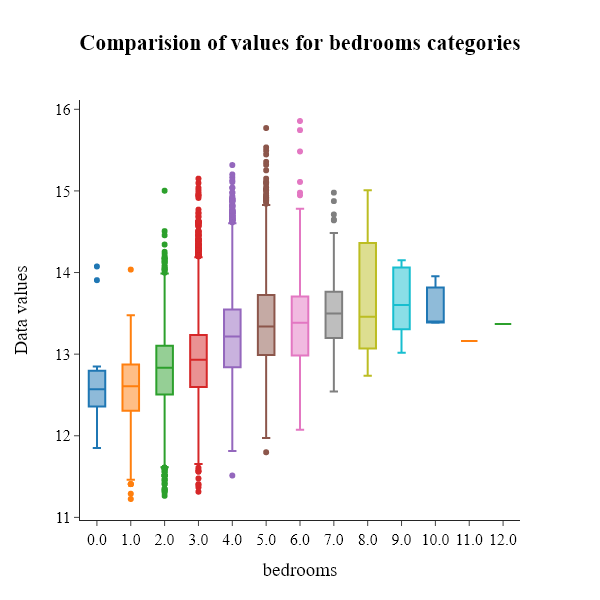

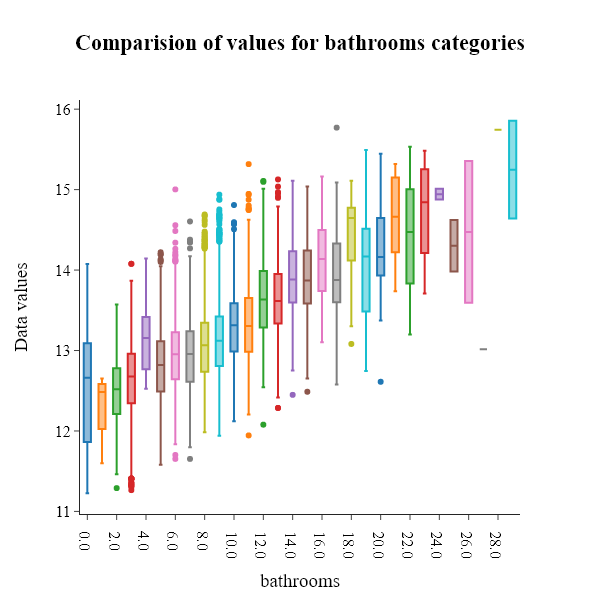

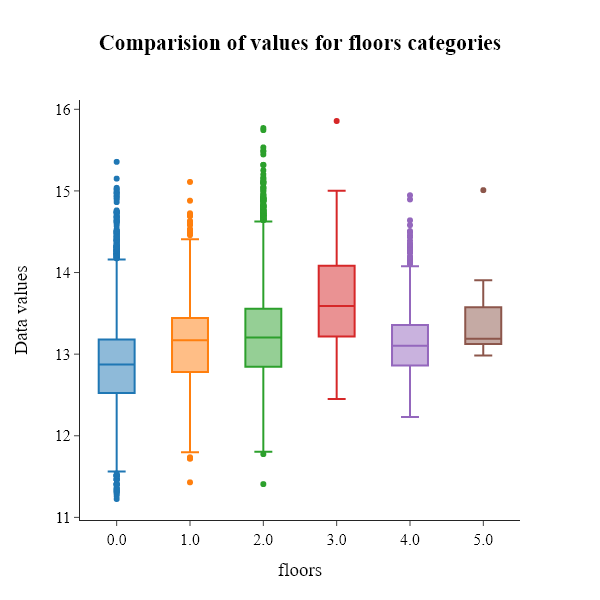

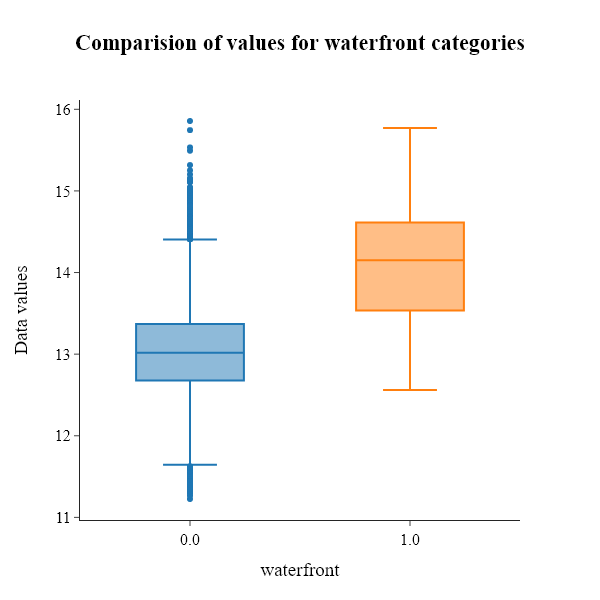

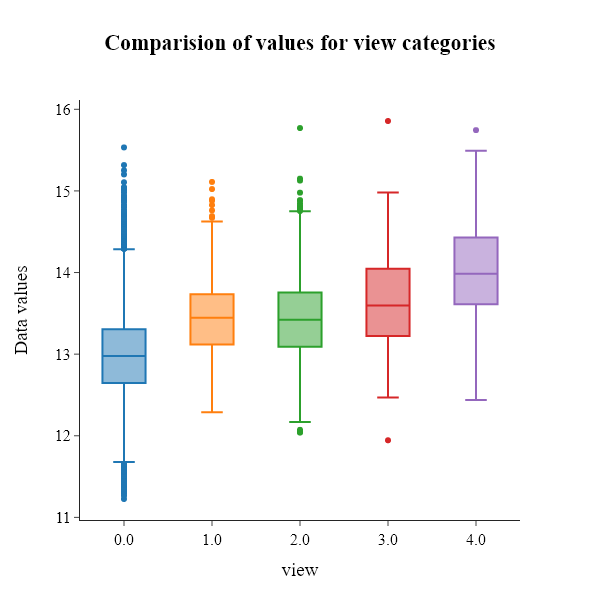

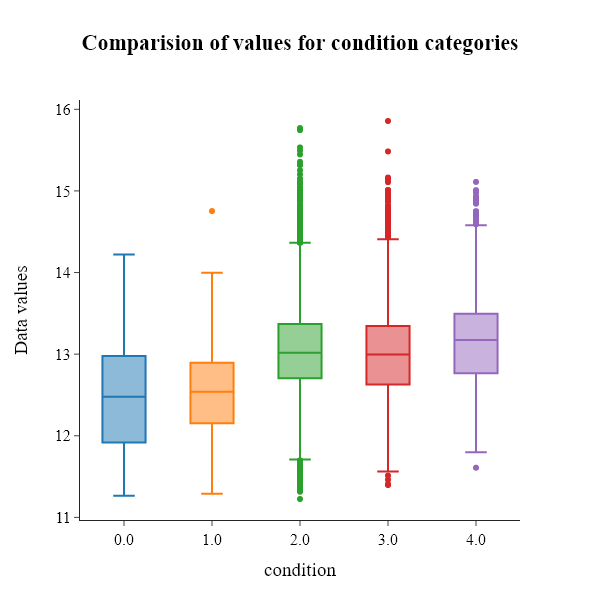

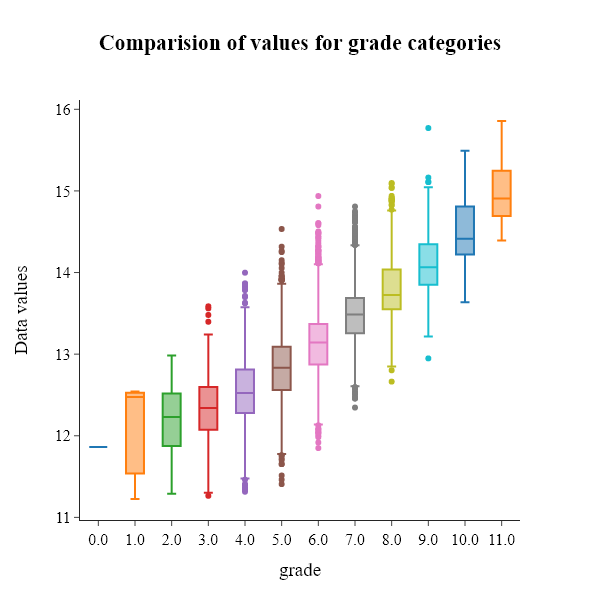

In [25]:
for feature in list_of_categorical_regression:
    Other_plots.barplot_anova(X=X_regression[feature], y=y_regression, feature_name=feature)

<h2>Correlation<h2>

$\text{Correlation analysis is an important part in any Data Science project.}$<p>
$\text{By looking at the correlations between features and the target variable, you can determine which features are most strongly related and should be included in the model.}$<p>
$\text{Each of the correlation measures below has the same hypotheses:}$<p>
$H_0 \text{: Correlation between variables is statistically insignificant.}$<p>
$H_1 \text{: Correlation between variables is statistically significant.}$<p>
$\textbf{Hypothesis verification:}$<p>
$\text{Test statistic used for hypothesis in correlation is t-student test:}
$$t=\frac{\rho\times\sqrt{N-2}}{\sqrt{1-\rho^2}}\sim t\left(N-2\right)$$

<h2>Pearson<h2>

$\textbf{Assumptions: } \text{Analyzed variables have a normal distribution.}$<p>
$\textbf{Formula:}$
$$\rho\left(X,Y\right)=\frac{Cov\left(X,Y\right)}{\sigma_X\times\sigma_Y}$$
$\textbf{Basic properties:}$<p>
$\text{- Measures the strength of the linear relationship between variables,}$<p>
$\text{- Sensitive to outlier observations,}$<p>
$\text{- Can only be used for continuous variables,}$<p>
$\text{- Interpretation:}$<p>
$\bullet \left[-1;-0.66\right)\rightarrow \text{ strong negative linear relationship,}$<p>
$\bullet \left[-0.66;-0.33\right)\rightarrow \text{ medium negative linear relationship,}$<p>
$\bullet \left[-0.33;0\right)\rightarrow \text{ weak negative linear relationship,}$<p>
$\bullet \left[0;0.33\right)\rightarrow \text{ weak positive linear relationship,}$<p>
$\bullet \left[0.33;0.66\right)\rightarrow \text{ medium positive linear relationship,}$<p>
$\bullet \left[0.66;1\right]\rightarrow \text{ strong positive linear relationship.}$

In [26]:
pearson_corr = Pearson_Correlation()
pearson_corr.fit(X=X_regression["sqft_lot"], y=y_regression, alpha=0.05)
print("Correlation: {}".format(np.round(pearson_corr.correlation_, 4)))
print("Test Statistic: {}".format(np.round(pearson_corr.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(pearson_corr.critical_value_, 4)))
print("p_value: {}".format(np.round(pearson_corr.p_value_, 4)))

Correlation: 0.0996
Test Statistic: 14.7191
Critical Value: 1.9601
p_value: 0.0


$|t| > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, correlation between variables is statistically significant.}$ 

In [27]:
for feature in X_regression.columns.tolist():
    if(feature not in list_of_categorical_regression):
        pearson_corr.fit(X=X_regression[feature], y=y_regression, alpha=0.05)
        print("Correlation between {} and dependent variable is statistically insignificant: {}.".format(feature, pearson_corr.keep_H0))

Correlation between sqft_lot and dependent variable is statistically insignificant: False.
Correlation between yr_built and dependent variable is statistically insignificant: False.
Correlation between yr_renovated and dependent variable is statistically insignificant: False.
Correlation between lat and dependent variable is statistically insignificant: False.
Correlation between long and dependent variable is statistically insignificant: False.
Correlation between sqft_living15 and dependent variable is statistically insignificant: False.
Correlation between sqft_lot15 and dependent variable is statistically insignificant: False.


$\text{So based on Pearson statistic, all correlations are statistically significant.}$

<h2>Spearman<h2>

$\textbf{Assumptions: } \text{None}$<p>
$\textbf{Formula:}$
$$\rho\left(X,Y\right)=\frac{Cov\left(R(X),R\left(Y\right)\right)}{\sigma_{R\left(X\right)}\times\sigma_{R\left(Y\right)}}$$
$\text{Where: } R(X) \text{ - ranks of the variable X.}$<p>
$\textbf{Basic properties:}$<p>
$\text{- Measures the strength of the monotonic relationship between variables,}$<p>
$\text{- Less sensitive to outlier observations,}$<p>
$\text{- Can be used for both continuous and categorical variables,}$<p>
$\text{- Interpretation:}$<p>
$\bullet \left[-1;-0.66\right)\rightarrow \text{ strong negative monotonic relationship,}$<p>
$\bullet \left[-0.66;-0.33\right)\rightarrow \text{ medium negative monotonic relationship,}$<p>
$\bullet \left[-0.33;0\right)\rightarrow \text{ weak negative monotonic relationship,}$<p>
$\bullet \left[0;0.33\right)\rightarrow \text{ weak positive monotonic relationship,}$<p>
$\bullet \left[0.33;0.66\right)\rightarrow \text{ medium positive monotonic relationship,}$<p>
$\bullet \left[0.66;1\right]\rightarrow \text{ strong positive monotonic relationship.}$

In [28]:
spearman_corr = Spearman_Correlation()
spearman_corr.fit(X=X_regression["sqft_lot"], y=y_regression, alpha=0.05)
print("Correlation: {}".format(np.round(spearman_corr.correlation_, 4)))
print("Test Statistic: {}".format(np.round(spearman_corr.test_statistic_, 4)))
print("Critical Value: {}".format(np.round(spearman_corr.critical_value_, 4)))
print("p_value: {}".format(np.round(spearman_corr.p_value_, 4)))

Correlation: 0.0749
Test Statistic: 11.0482
Critical Value: 1.9601
p_value: 0.0


$|t| > K \wedge p\_value < \alpha \rightarrow \text{We reject the null hypothesis in favor of the alternative hypothesis.}$<p>
$\text{Thus, correlation between variables is statistically significant.}$ 

$\text{Because Spearman correlation might be also used with categorical inputs, try it for regression and classification data.}$

In [29]:
spearman_regression_ranks = {feature: 0 for feature in X_regression.columns.tolist()}
for feature in X_regression.columns.tolist():
    spearman_corr.fit(X=X_regression[feature], y=y_regression, alpha=0.05)
    print("Correlation between {} and dependent variable is statistically insignificant: {}.".format(feature, spearman_corr.keep_H0))
    spearman_regression_ranks.update({feature: np.abs(spearman_corr.correlation_)})
spearman_regression_ranks = {key: rank for rank, key in enumerate(sorted(spearman_regression_ranks, key=spearman_regression_ranks.get, reverse=True), 1)}

Correlation between bedrooms and dependent variable is statistically insignificant: False.
Correlation between bathrooms and dependent variable is statistically insignificant: False.
Correlation between sqft_lot and dependent variable is statistically insignificant: False.
Correlation between floors and dependent variable is statistically insignificant: False.
Correlation between waterfront and dependent variable is statistically insignificant: False.
Correlation between view and dependent variable is statistically insignificant: False.
Correlation between condition and dependent variable is statistically insignificant: False.
Correlation between grade and dependent variable is statistically insignificant: False.
Correlation between yr_built and dependent variable is statistically insignificant: False.
Correlation between yr_renovated and dependent variable is statistically insignificant: False.
Correlation between lat and dependent variable is statistically insignificant: False.
Corre

$\text{So based on Spearman statistic, all correlations in regression dataset are statistically significant.}$

In [30]:
spearman_classification_ranks = {feature: 0 for feature in X_classification.columns.tolist()}
for feature in X_classification.columns.tolist():
    spearman_corr.fit(X=X_classification[feature], y=y_classification, alpha=0.05)
    print("Correlation between {} and dependent variable is statistically insignificant: {}.".format(feature, spearman_corr.keep_H0))
    spearman_classification_ranks.update({feature: np.abs(spearman_corr.correlation_)})
spearman_classification_ranks = {key: rank for rank, key in enumerate(sorted(spearman_classification_ranks, key=spearman_classification_ranks.get, reverse=True), 1)}

Correlation between age and dependent variable is statistically insignificant: True.
Correlation between job and dependent variable is statistically insignificant: False.
Correlation between marital and dependent variable is statistically insignificant: False.
Correlation between education and dependent variable is statistically insignificant: False.
Correlation between default and dependent variable is statistically insignificant: False.
Correlation between balance and dependent variable is statistically insignificant: False.
Correlation between housing and dependent variable is statistically insignificant: False.
Correlation between loan and dependent variable is statistically insignificant: False.
Correlation between contact and dependent variable is statistically insignificant: False.
Correlation between day and dependent variable is statistically insignificant: False.
Correlation between month and dependent variable is statistically insignificant: False.
Correlation between durati

$\text{So based on Spearman statistic, all correlations (exept of age variable) in classification dataset are statistically significant.}$

<h2>Hoeffding<h2>

$\textbf{Assumptions: } \text{None}$<p>
$\textbf{Hypotheses:}$<p>
$H_0 \text{: There is no relationship between the variables.}$<p>
$H_1 \text{: There is a relationship between the variables.}$<p>
$\textbf{Formula:}$
$$D\left(X,Y\right)=30\times\frac{\left(N-2\right)\times\left(N-3\right)\times D1+D2-2\times\left(N-2\right)\times D3}{N\times\left(N-1\right)\times\left(N-2\right)\times\left(N-3\right)\times(N-4)}$$
$\text{Where: } N \text{ - the number of observations in the dataset,}$<p>
$D1=\sum_{i=1}^{N}{\left(q_i\left(X,Y\right)-1\right)\times\left(q_i\left(X,Y\right)-2\right)},$<p>
$D2=\sum_{i=1}^{N}{\left(r_i\left(X\right)-1\right)\times\left(r_i\left(X\right)-2\right)\times\left(r_i\left(Y\right)-1\right)\times\left(r_i\left(Y\right)-2\right)},$<p>
$D3=\sum_{i=1}^{N}{\left(r_i\left(X\right)-2\right)\times\left(r_i\left(Y\right)-2\right)\times\left(q_i\left(X,Y\right)-1\right)}.$<p>
$\text{If we assume that: }$
$$u=\begin{cases}
                1 \text{, if } t>0 \\
                0.5 \text{, if } t=0 \\ 
                0 \text{, if } t<0
\end{cases}$$
$\text{Then, the rank for observation } i \text{ in a set containing } N \text{ observations is determined as follows:}$
$$r_i\left(X\right)=\frac{1}{2}+\sum_{j=1}^{N}{u(x_i-x_j)}$$
$\text{For two-dimensional rank for observation } i \text{ and pair } \left(x_i,\ y_i\right):$
$$q_i\left(X,Y\right)=\frac{3}{4}+\sum_{j=1}^{N}{u\left(x_i-x_j\right)\times u\left(y_i-y_j\right)}$$
$\textbf{Basic properties:}$<p>
$\text{- Measures the relationship between variables broadly (catches nonlinearity well in particular).}$<p>
$\text{- Less sensitive to outlier observations,}$<p>
$\text{- Can be used for both continuous and categorical variables,}$<p>
$\text{- Interpretation: Not clear, generally the higher the value of the D coefficient, the greater the relationship between variables. D range: [-0.5;1].}$

$\text{Because calculation of p-value in Hoeffding is difficult, we will only rely on Hoeffding Distance value.}$<p>
$\text{Also due to high time consuming process we will use only 20\% of random data from each set.}$

In [31]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, shuffle=True, random_state=17)
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, shuffle=True, random_state=17)

In [32]:
hoeffding = Hoeffding()
hoeffding_regression_ranks = {feature: 0 for feature in X_test_regression.columns.tolist()}
for feature in X_test_regression.columns.tolist():
    hoeffding.fit(X=X_test_regression[feature], y=y_test_regression, alpha=0.05)
    print("Hoeffding distance between {} and dependent variable is equal to: {}.".format(feature, np.round(hoeffding.hoeffding_distance_, 4)))
    hoeffding_regression_ranks.update({feature: hoeffding.hoeffding_distance_})
hoeffding_regression_ranks = {key: rank for rank, key in enumerate(sorted(hoeffding_regression_ranks, key=hoeffding_regression_ranks.get, reverse=True), 1)}

Hoeffding distance between bedrooms and dependent variable is equal to: 0.029.
Hoeffding distance between bathrooms and dependent variable is equal to: 0.0777.
Hoeffding distance between sqft_lot and dependent variable is equal to: 0.0051.
Hoeffding distance between floors and dependent variable is equal to: 0.0233.
Hoeffding distance between waterfront and dependent variable is equal to: -0.0002.
Hoeffding distance between view and dependent variable is equal to: 0.0065.
Hoeffding distance between condition and dependent variable is equal to: -0.0001.
Hoeffding distance between grade and dependent variable is equal to: 0.1439.
Hoeffding distance between yr_built and dependent variable is equal to: 0.008.
Hoeffding distance between yr_renovated and dependent variable is equal to: -0.0001.
Hoeffding distance between lat and dependent variable is equal to: 0.0817.
Hoeffding distance between long and dependent variable is equal to: 0.004.
Hoeffding distance between sqft_living15 and depen

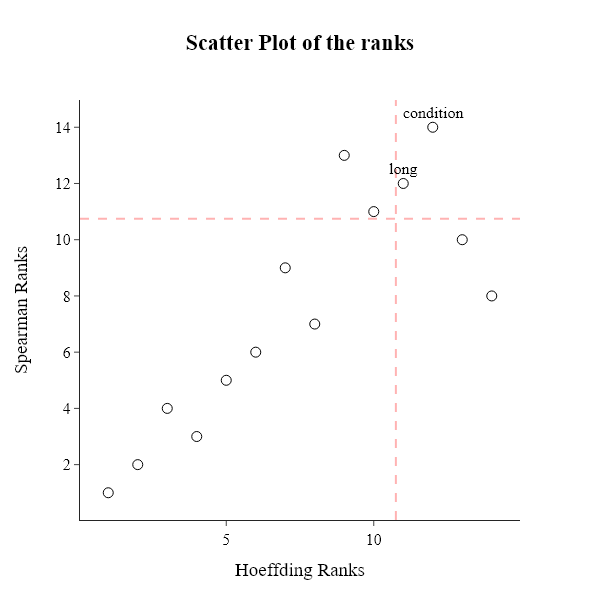

In [33]:
Other_plots.scatter_plot_of_ranks(spearman_ranks=spearman_regression_ranks, hoeffding_ranks=hoeffding_regression_ranks, quantile=0.75)

$\text{As we can see, condition and long variables obtained bad ranks for both: Spearman and Hoeffding correlation.}$<p>
$\text{In machine learning project, we could remove them and verify whether the results for the validation set have improved.}$

In [34]:
hoeffding_classification_ranks = {feature: 0 for feature in X_test_classification.columns.tolist()}
for feature in X_test_classification.columns.tolist():
    hoeffding.fit(X=X_test_classification[feature], y=y_test_classification, alpha=0.05)
    print("Hoeffding distance between {} and dependent variable is equal to: {}.".format(feature, np.round(hoeffding.hoeffding_distance_, 4)))
    hoeffding_classification_ranks.update({feature: hoeffding.hoeffding_distance_})
hoeffding_classification_ranks = {key: rank for rank, key in enumerate(sorted(hoeffding_classification_ranks, key=hoeffding_classification_ranks.get, reverse=True), 1)}

Hoeffding distance between age and dependent variable is equal to: 0.0006.
Hoeffding distance between job and dependent variable is equal to: 0.0015.
Hoeffding distance between marital and dependent variable is equal to: -0.0.
Hoeffding distance between education and dependent variable is equal to: 0.0009.
Hoeffding distance between default and dependent variable is equal to: -0.0006.
Hoeffding distance between balance and dependent variable is equal to: 0.0042.
Hoeffding distance between housing and dependent variable is equal to: 0.0038.
Hoeffding distance between loan and dependent variable is equal to: -0.0.
Hoeffding distance between contact and dependent variable is equal to: 0.0059.
Hoeffding distance between day and dependent variable is equal to: 0.0008.
Hoeffding distance between month and dependent variable is equal to: 0.0003.
Hoeffding distance between duration and dependent variable is equal to: 0.0527.
Hoeffding distance between campaign and dependent variable is equal t

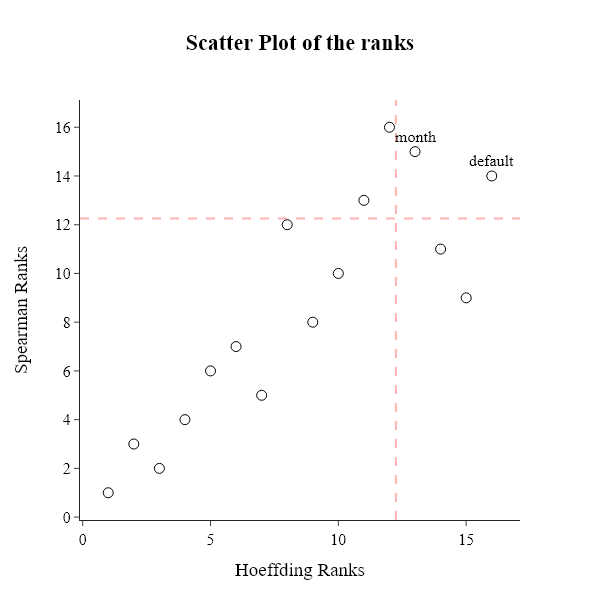

In [35]:
Other_plots.scatter_plot_of_ranks(spearman_ranks=spearman_classification_ranks, hoeffding_ranks=hoeffding_classification_ranks, quantile=0.75)

$\text{For classification data, features that were ranked low are: month and default.}$<p>
$\text{One more feature of the graph is worth noting.}$<p>
$\text{We can see an almost linear relationship between the Hoeffding and Spearman ranks.}$<p>
$\text{This means that both statistics "agree" with each other on the relationship between the characteristics and the dependent variable.}$<p>
$\text{Thus, we have a tool that, by combining two methods, gives more reliable results.}$

<h1>Advanced techniques<h1>

<h2>Linear Discriminant Analysis<h2>

$\text{Discriminant analysis is a learning method used to resolve which factors (variables) distinguish (discriminate) two or more emergent groups.}$<p>
$\text{We are looking for rules to assign multidimensional objects to one of many classes with the minimum possible classification errors.}$<p>
$\text{The main idea is to resolve whether the groups differ due to the average value of some characteristic (variable), and then use this variable to predict group membership.}$

<h3>Description of the method<h3>

$\text{The search is for such a linear combination of object features that will optimally assign them to classes.}$<p>
$\text{The procedure minimizes the variance of object features within a class and maximizes the variance between classes.}$<p>
$\text{Intra-class variance:}$
$$W=\frac{1}{N-2}\times\sum_{m=1}^{M}\sum_{i=1}^{N}\left(X_{i,\ m}-{\bar{X}}_m\right)^2$$
$\text{Inter-group variance:}$
$$B=\frac{1}{K-1}\times\sum_{k=1}^{K}{N_k\times\left({\bar{X}}_k-\bar{X}\right)^2}$$
$\text{Where: } N \text{ - the number of observations in the dataset,}$<p>
$M \text{ - the number of variables,}$<p>
${\bar{X}}_m \text{ - the average for variable } m,$<p>
$K \text{ - number of classes,}$<p>
$N_k \text{ - number of observations located in class } k,$<p>
${\bar{X}}_k \text{ - the average inside class } k.$<p>
$\text{The goal of LDA is to find such a vector w that will reduce the data into a lower dimensional space in an optimal way.}$<p>
$\text{The first step will be to calculate predictive averages for each class.}$
$${\widetilde{X}}_k=\frac{1}{N_k}\times\sum_{i=1}^{N_k}{w^T\times X_i}=w^T\times\frac{1}{N_k}\times\sum_{i=1}^{N_k}X_i=w^T\times\mu_k$$
$\text{Where: } N_k \text{ - the size of the set with the dependent variable belonging to class } k,$<p>
$\mu_k \text{ - vector of averages of length } M \text{ (number of variables), for all observations with the dependent variable belonging to class } k.$<p>
$\text{Thus, if we would consider only two classes, let us note that the condition about maximizing the separation between classes is obtained by the formula:}$
$$\left({\widetilde{X}}_1-{\widetilde{X}}_2\right)^2=\left(w^T\times\mu_1-w^T\times\mu_2\right)^2=w^T\times\left(\mu_1-\mu_2\right)\times\left(\mu_1-\mu_2\right)^T\times w=w^T\times B\times w$$
$\text{Where: } B \text{ - matrix of dispersion between classes.}$<p>
$\text{In case we have more than one class, the } B \text{ matrix can be calculated using the formula:}$
$$B=\sum_{k=1}^{K}{N_k\times\left(\mu_k-\mu\right)\times\left(\mu_k-\mu\right)^T}$$
$\text{However, a second condition still needs to be determined, which relates to reducing the variance within each class.}$<p>
$\text{If the variance is too high, there may be a bad distribution and shuffling of points.}$<p>
$\text{Thus, we use the following formula:}$
$$s_k^2=\sum_{i=1}^{N_k}\left(w^T\times x_i-w^T\times\mu_i\right)^2=\sum_{i=1}^{N_k}\left(w^T\times\left(x_i-\mu_i\right)\right)^2=w^T\times\sum_{i=1}^{N_k}\left(\left(x_i-\mu_i\right)\times\left(x_i-\mu_i\right)^T\right)\times w=w^T\times S_k\times w$$
$\text{Where: } S_k \text{ - scatter matrix inside class } k.$<p>
$\text{We can perform analogous operations for the other classes as well, so that we get:}$
$$\sum_{i=1}^{K}s_k^2=w^T\times S\times w$$
$\text{We will calculate the matrix } S \text{ from the formula:}$
$$S=\sum_{k=1}^{K}\sum_{i=1}^{N_k}{\left(X_i-\mu_k\right)\times\left(X_i-\mu_k\right)^T}$$
$\text{Taking all of the above things into account, we can write the objective function as:}$
$$\max{J\left(w\right)}=\frac{w^T\times B\times w}{w^T\times S\times w}$$
$$\frac{\partial J\left(w\right)}{\partial w}=\frac{2\times B\times w\times w^T\times S\times w-2\times S\times w\times w^T\times B\times w}{\left(w^T\times S\times w\right)^2}=0$$
$$B\times w\times w^T\times S\times w=S\times w\times w^T\times B\times w$$
$$B\times w=S\times w\times\frac{w^T\times B\times w}{w^T\times S\times w}$$
$$B\times w=J\left(w\right)\times S\times w$$
$$B\times w=\lambda\times S\times w$$
$$S^{-1}\times B\times w=\lambda\times S^{-1}\times S\times w$$
$$\left(S^{-1}\times B\right)\times w=\lambda\times w$$
$\text{The above equation is a general eigenvalue-eigenvector decomposition, where: } \lambda=J(w) \text{ is the eigenvalue, and w is the eigenvector for the matrix } S^{-1}\times B.$

In [36]:
lda = Linear_Discriminant_Analysis(n_components=1)
X_transformed = lda.fit_transform(X=X_train_classification, y=y_train_classification)

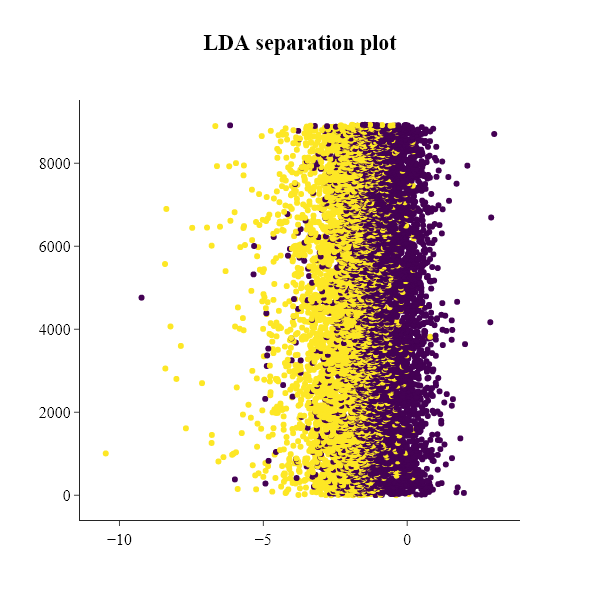

In [37]:
Other_plots.lda_separation_plot(X_transformed=X_transformed, y=y_train_classification)

$\text{The chart above shows how, with the help of LDA, we were able to reduce the data to just one dimension while maintaining separability between classes quite well.}$

<h3>Advantages and disadvantages of LDA<h3>

$\text{Advantages of LDA:}$<p>
$\text{- Improving classifier performance by reducing dimensionality while maximizing class separability,}$<p>
$\text{- By reducing dimensionality while preserving class-related information, LDA can help prevent overfitting,}$<p>
$\text{- No need for data standardization/scaling.}$<br>

$\text{Disadvantages of LDA:}$<p>
$\text{- LDA is a supervised method and can only be used for classification problems,}$<p>
$\text{- Normal distribution of all variables is assumed, which is rarely the case,}$<p>
$\text{- LDA is a linear method and may not capture complex nonlinear relationships.}$

<h2>PCA<h2>

$\text{Principal Component Analysis is a statistical procedure used to reduce the dimensionality of a data set.}$<p>
$\text{Using an orthogonal transformation, it transforms a set of correlated observations into a set of linearly uncorrelated values called principal components.}$<p>
$\text{Because the calculation is based on variance and covariance, the method should only be used for continuous variables.}$<p>
$\text{The PCA procedure consists of the following steps:}$<p><br>
$1. \textbf{ Scaling the dataset:}$<p>
$\text{The goal of PCA is to maximize the mapping of variance and the original dataset.}$<p>
$\text{Thus, if any variable has a larger nominal variance than the others, our algorithm will be weighted toward that variable.}$<p>
$\text{In addition, PCA assumes that the data are "centered" in such a way that the average for each variable is 0:}$
$$\mu=\frac{1}{N}\times\sum_{i=1}^{N}X_i=0$$
$\text{Where: } N \text{ - the number of observations in the set.}$<p>
$\text{Thus, the best option for continuous variables will be to standardize them, or use a quantile transformation.}$<p>
$2. \textbf{ Determination of the variance-covariance matrix for the data set:}$<p>
$\text{The covariance between two variables can be calculated as:}$
$$Cov\left(X,Y\right)=\frac{1}{N-1}\times\sum_{i=1}^{N}{\left(x_i-\bar{X}\right)\times\left(y_i-\bar{Y}\right)}$$
$\text{Since there may be many variables in the dataset, an easier formula to determine it for all features is the variance-covariance matrix:}$
$$Cov=\frac{1}{N-1}\times\sum_{m=1}^{M}{X_m\times{X_m}^T}=\left[\begin{matrix}Var(X_1)&Cov(X_2,X_1)&\cdots&Cov(X_M,X_1)\\Cov(X_1,X_2)&Var(X_2)&\cdots&Cov(X_2,X_M)\\\vdots&\vdots&\ddots&\vdots\\Cov(X_1,X_M)&Cov(X_2,X_M)&\cdots&Var(X_M)\\\end{matrix}\right]$$
$\text{Where: } M \text{ - the number of variables in the set.}$<p><br>
$3. \textbf{ Determination of eigenvalues and eigenvectors:}$<p>
$\text{Eigenvectors are vectors that, when multiplied by a matrix, give a different vector (scaled), but with the same direction and the same/opposite direction.}$<p>
$\text{The vector obtained by such multiplication will be forward or backward depending on the eigenvalue.}$<p>
$\text{To determine the eigenvalues and eigenvectors of the Cov matrix, solve the following:}$
$$Cov\ \times x=\lambda\times x$$
$$\left(Cov\ -\lambda\times I\right)\times x=0$$
$$Cov\ -\lambda\times I=0$$
$\text{Where: } x \text{ - eigenvector,}$<p>
$\lambda \text{ - eigenvalue,}$<p>
$I \text{ - identity matrix,}$<p><br>
$4. \textbf{ Selection of n eigenvectors for which the eigenvalues were largest: n\_eigenvectors}$<p><br>
$5. \textbf{ Dataset transformation:}$<p>
$$X\_Transformed=X\times n\_eigenvectors$$

$\text{To better undestand how PCA works, let's do some visualization.}$<p>
$\text{We will create a special dataset will be created.}$

In [38]:
from sklearn.datasets import make_regression
X, y = make_regression(1000, 1, noise=5, bias=5, random_state=17)
X = np.concatenate([X, y[:, None]], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
pca = PCA(n_components=2, random_state=17)
X_transformed = pca.fit_transform(X_scaled)

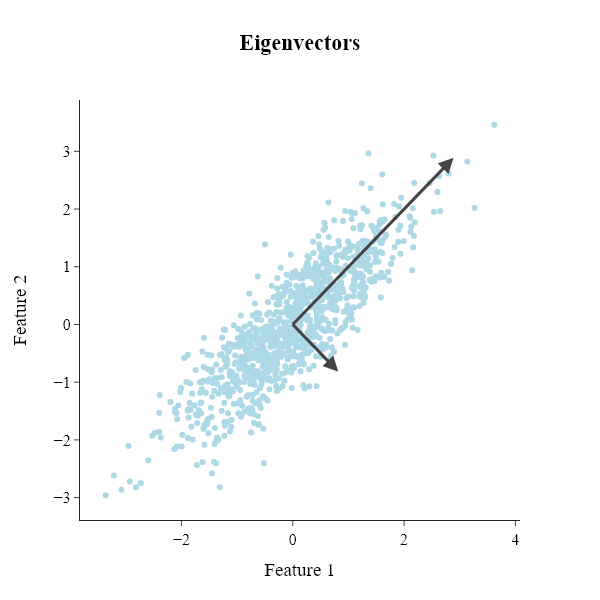

In [40]:
Other_plots.eigenvectors_2d(fitted_pca=pca, feature1=X_scaled[:,0], feature2=X_scaled[:,1])

$\text{The vectors represent the major axes of the data, and their lengths indicate how "much" variance each axis explains.}$<p>
$\text{More specifically, each vector represents a measure of the variance of the data when projected onto an axis (eigenvector).}$<p><br>
$\text{Reduced to one dimension, the matrix can be nicely visualized using the inverse\_transform method:}$

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=17)
X_transformed = pca.fit_transform(X_scaled)
X_inverse_transformed = pca.inverse_transform(X_transformed)

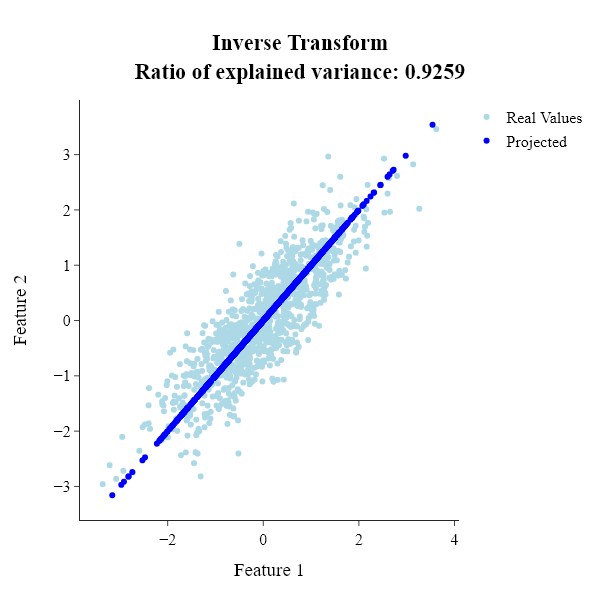

In [42]:
Other_plots.iversed_plot(fitted_pca=pca, feature1=X_scaled[:,0], feature2=X_scaled[:,1], feature1_inversed=X_inverse_transformed[:,0], feature2_inversed=X_inverse_transformed[:,1])

$\text{The bright points are the original data, while the dark points are the effect of the projection.}$<p>
$\text{The graph explains exactly what PCA does: the information along the most important axis (eigenvector) is retained, while the points along it - removed.}$<p>
$\text{The portion of the variance that is cut out (proportional to the spread of points around the projected line)}$<p>
$\text{is a measure of how much "information" is discarded due to dimensionality reduction - in this case, about 92.6\% of the variance is preserved.}$<p>
$\text{In addition, the graph also shows the linear transformation of the data very well.}$<p>
$\text{The values obtained with PCA are:}$
$$X\_Transformed=v\_1\times Feature\_1+v\_2\times Feature\_2$$
$\text{Where: } eigenvector=\left[\begin{matrix}v\_1\\v\_2\\\end{matrix}\right].$

$\text{As mentioned in description, PCA should be used for continous AND scaled variables.}$<p>
$\text{Let's start with classification dataset.}$

In [43]:
X_classification_pca = X_classification.drop(list_of_categorical_classification, axis=1)
scaler = StandardScaler()
X_classification_scaled_pca = scaler.fit_transform(X_classification_pca)
print("Number of continous features: {}".format(X_classification_scaled_pca.shape[1]))

Number of continous features: 7


$\text{Obviously it is not easy to tell before application how many components should be chosen.}$<p>
$\text{We will start with 5 and see on the plots how much variance were we able to explain with them.}$

In [44]:
pca_transformer = PCA(n_components=5, random_state=17)
pca_transformer.fit(X_classification_scaled_pca)

PCA(n_components=5, random_state=17)

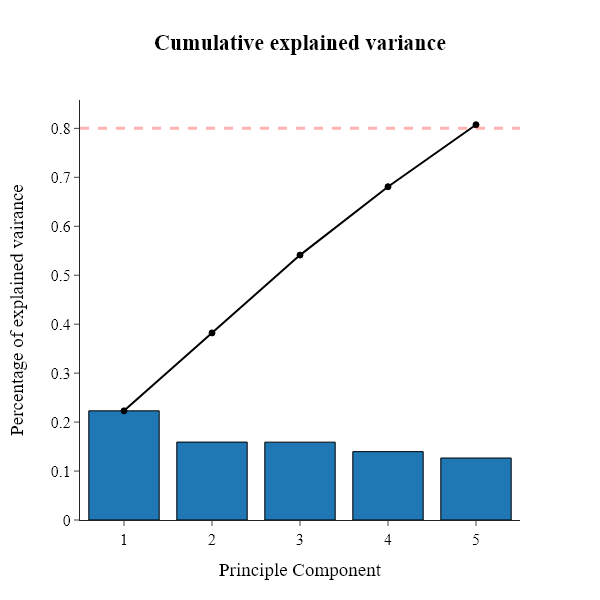

In [45]:
Other_plots.cumulative_explained_variance(fitted_pca=pca_transformer)

$\text{Well it does not look good for us.}$<p>
$\text{Continous data might not be linearly correlated enough.}$<p>
$\text{PCA does not have the ability to reduce data and preserve most of the variance.}$<p>
$\text{We reach 80\% of variance explained with 5 components in the model, so the reduction would probably not be the best option there.}$

$\text{Now regression.}$

In [46]:
X_regression_pca = X_regression.drop(list_of_categorical_regression, axis=1)
scaler = StandardScaler()
X_regression_scaled_pca = scaler.fit_transform(X_regression_pca)
print("Number of continous features: {}".format(X_regression_scaled_pca.shape[1]))

Number of continous features: 7


$\text{Let's also start with five components.}$

In [47]:
n_components=5
pca_transformer = PCA(n_components=n_components, random_state=17)
pca_transformer.fit(X_regression_scaled_pca)
pd.DataFrame(pca_transformer.components_.T, columns=[f'PC {i+1}' for i in range(0, n_components)], index=X_classification_pca.columns)

,PC 1,PC 2,PC 3,PC 4,PC 5
age,0.478016,0.484029,0.076363,0.162621,-0.010326
balance,0.364656,-0.535425,0.034337,-0.024848,0.105838
day,-0.097568,0.356162,-0.386984,-0.786508,0.146897
duration,-0.161656,0.076230,-0.746875,0.531234,0.330276
campaign,0.467950,-0.263754,-0.076982,-0.194910,0.640640
pdays,0.372013,-0.253122,-0.526378,-0.111306,-0.668140
previous,0.495483,0.461234,0.049095,0.147493,-0.034645


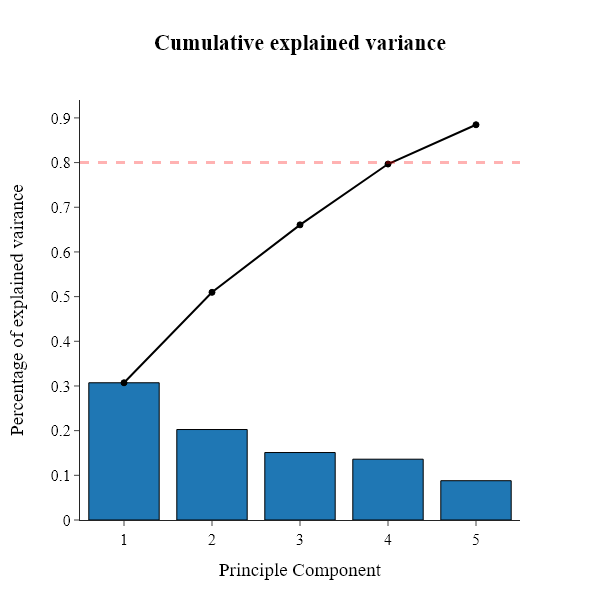

In [48]:
Other_plots.cumulative_explained_variance(fitted_pca=pca_transformer)

$\text{Well it looks a bit better than for classification, we are able to explain 80\% of variance with 4 components.}$<p>

$\text{Before moving onto the next method let's also try KernelPCA.}$

<h2>Kernel PCA<h2>

$\text{The disadvantage of the classical approach is the use of a linear transformation to determine the eigenvectors.}$<p>
$\text{If there is a nonlinear relationship between the variables, a better approach would be to use the kernel trick, described in more detail for the SVM algorithm }$ [here](https://github.com/kvbiii/ML_Algorithms_from_scratch/blob/main/SVM/SVM_example.ipynb)<p>
$\text{If we denote the kernel function as: } K, \text{ then:}$<p>
$$Cov=K$$
$\text{So one of the changes (actually substitution) in the above scheme occurs for point 2., when determining the covariance matrix.}$<p>
$\text{Another important modification is the addition of automatic "centering" of data described in Section 1.}$<p>
$\text{If we write the kernel function between variable } m \text{ and } l \text{ as:}$
$$K\left(X_m,X_l\right)={\phi\left(X_m\right)}^T\phi(X_l)$$
$\text{This is when the centralized value for a single observation } i \text{ of variable } m \text{ will take the value:}$
$$\widetilde{\phi}\left(x_{m,i}\right)=\phi\left(x_{m,i}\right)-\frac{1}{N}\times\sum_{k=1}^{N}\phi\left(x_{m,k}\right)$$
$\text{Thus, the centralized kernel kernel for the selected two observations } i, \ j:$
$$\widetilde{K}\left(x_{m,i},x_{m,j}\right)={\widetilde{\phi}\left(x_{m,i}\right)}^T\widetilde{\phi}\left(x_{m,j}\right)=\left(\phi\left(x_{m,i}\right)-\frac{1}{N}\times\sum_{k=1}^{N}\phi\left(x_{m,k}\right)\right)\left(\phi\left(x_{m,j}\right)-\frac{1}{N}\times\sum_{k=1}^{N}\phi\left(x_{m,k}\right)\right)=$$
$$=K\left(x_{m,i},x_{m,j}\right)-\frac{1}{N}\times\sum_{k=1}^{N}K\left(x_{m,k},x_{m,j}\right)-\frac{1}{N}\times\sum_{k=1}^{N}K\left(x_{m,k},x_{m,i}\right)+\frac{1}{N^2}\times\sum_{k=1}^{N}K\left(x_{m,k},x_{m,k}\right)=$$
$$=K\left(x_{m,i},x_{m,j}\right)-1_{\frac{1}{N}\ }\times K\left(x_{m,i},x_{m,j}\right)-1_{\frac{1}{N}\ }\times K\left(x_{m,j},\ x_{m,i}\right)+1_{\frac{1}{N}\ }\times K\left(x_{m,i},x_{m,j}\right)\times1_{\frac{1}{N}\ }$$
$\text{Next, we should also normalize the value of the eigenvectors, because in the case of the kernel trick, they were calculated for the squares of the eigenvalues.}$
$$eigenvectors\_normalized=\frac{eigenvectors}{\sqrt{eigenvalues}}$$
$\text{If we used kernel centering, the last point (when transforming the input dataset) should take this into account:}$
$$X\_Transformed=\widetilde{K}\times n\_eigenvectors\_normalized$$

$\text{Let's try KernelPCA with classification data, because the results were worse than in regression.}$

$\text{Kernel: } rbf$
$$K\left(X_i,X_j\right)=e^{-\gamma\times\left|\left|X_i-X_j\right|\right|^2}$$

In [49]:
pca_transformer = Kernel_PCA(n_components=5, kernel="rbf", gamma=1/X_classification_scaled_pca.shape[1], random_state=17)
pca_transformer.fit(X_classification_scaled_pca)

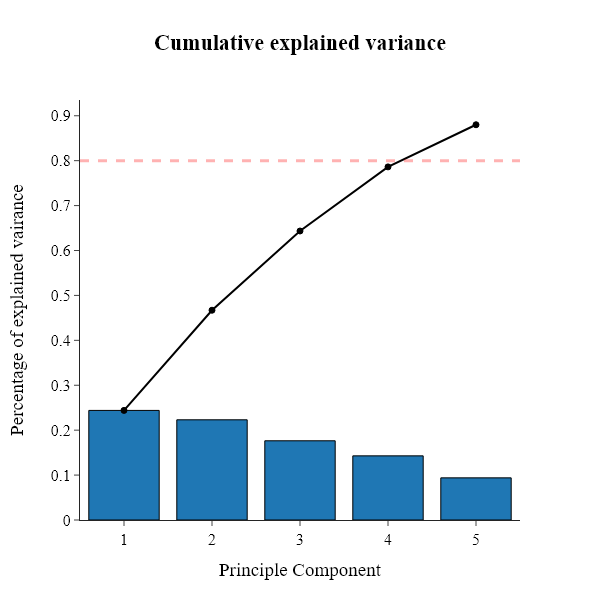

In [50]:
Other_plots.cumulative_explained_variance(fitted_pca=pca_transformer)

$\text{Well it looks a bit better, because using 5 components could explain 90\% variance of 7 features.}$<p>
$\text{For linear kernel it was approximately 80\%.}$

$\text{Kernel: } poly$
$$K\left(X_i,X_j\right)=\left(\gamma\times X_i^T\times X_j+1\right)^{degree}$$

In [51]:
pca_transformer = Kernel_PCA(n_components=5, kernel="poly", gamma=1/X_classification_pca.shape[1], degree=3, random_state=17)
pca_transformer.fit(X_classification_scaled_pca)

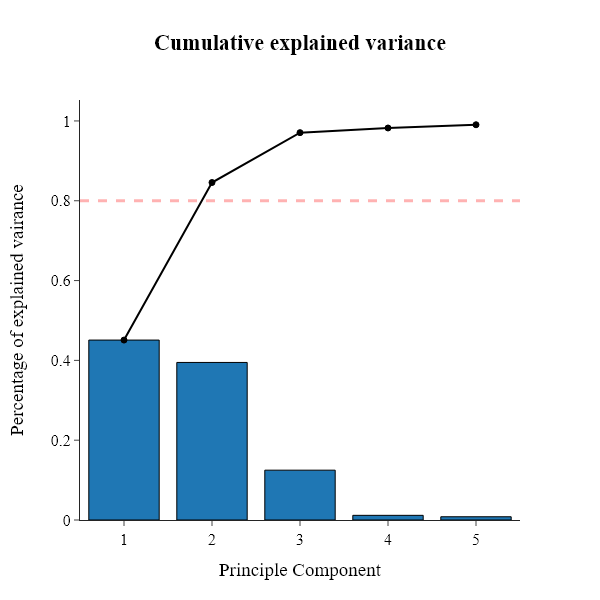

In [52]:
Other_plots.cumulative_explained_variance(fitted_pca=pca_transformer)

$\text{It looks like we have the winner.}$<p>
$\text{Poly kernel gives the best results.}$<p>
$\text{3 first components explain almost all of the variance in the continous dataset.}$<p>
$\text{It means that using kernelPCA we would be able to reduce the dimensions from 7 to 3 while keeping most of the variance!}$

<h3>Advantages and disadvantages of PCA<h3>

$\text{Advantages of PCA:}$<p>
$\text{- Removing correlated variables that only introduce unnecessary noise in the data,}$<p>
$\text{- Preventing overfitting by reducing the number of variables,}$<p>
$\text{- Reducing training time and the ability to accurately train estimators (for example, finding accurate coefficients) by reducing dimensionality.}$<br>

$\text{Disadvantages of PCA:}$<p>
$\text{- Much harder interpretation of the results obtained,}$<p>
$\text{- Standarization of variables is obligated,}$<p>
$\text{- If too few components are chosen, we may lose too much information and reduce the ability to train the algorithm.}$

<h2>Factor Analysis<h2>

$\text{Classical factor analysis (FA) is used to find latent factors that determine the relationships between the primary variables.}$<p>
$\text{It is a linear modeling method - it is assumed that variables can be represented by a linear function of latent variables (factors that are more significant in the data set).}$<p>
$\text{Factor analysis attempts to explain a set of } N \text{ observations and } M \text{ variables using } k \text{ factors.}$<p>
$\text{Each variable is assigned several } k \text{ factors, which are associated with a factor loading matrix (} F \text{):}$
$$x_{i,m}-\mu_i=\lambda_{i,1}\times f_{1,m}+\ldots+\lambda_{i,k}\times f_{k,m}+\varepsilon_{i,m}$$
$\text{Where: } x_{i,m} \text{ - the value of observation } i \text{ of variable } m,$<p>
$\mu_i \text{ - the average of all variables for observation } i,$<p>
$\lambda_{i,1} \text{ - factor loading for observation } i \text{ and factor } k,$<p>
$f_{j,m} \text{ - value of factor } j \text{ for variable } m,$<p>
$\varepsilon_{i,m} \text{ - random error.}$<p><br>
$\text{The assumptions for factor analysis are as follows:}$
$$\sigma_m^2=\lambda_{i,1}^2+\lambda_{i,2}^2+\ldots+\lambda_{i,k}^2+\psi=\sum_{j=1}^{k}\lambda_{i,j}^2+\psi$$
$$Cov\left(X_i,\ X_j\right)=\lambda_{i,1}\times\lambda_{j,1}+\lambda_{i,2}\times\lambda_{j,2}+\ldots+\lambda_{i,k}\times\lambda_{j,k}$$
$$\Sigma=\Psi^\frac{1}{2}\times\left(F\times F^\prime+I\right)\times\Psi^\frac{1}{2}$$
$\text{Where: } \sigma_m^2 \text{ - variance of variable } m,$<p>
$\sum_{j=1}^{k}\lambda_{i,j}^2 \text{ - common variance of variable } m,$<p>
$\psi_m \text{ - specific variability/noise of variable } m,$<p>
$\Sigma \text{ - covariance matrix,}$<p>
$\Psi \text{ - noise matrix,}$<p>
$I \text{ - identity matrix,}$<p>
$F \text{ - factor matrix.}$<p><br>
$\text{The goal of the model is to find such values of } F \text{ and } \Psi \text{ that best preserve the structure of the covariance matrix.}$<p>
$\text{If we know the noise matrix } (F) \text{ then we can determine the optimal factor matrix } (F).$<p>
$\text{Iteratively modifying the value of } \Psi \text{, we can arrive at the calculation of the optimal value of } F.$<p>
$\text{The algorithm by which we will attempt to estimate the values of the matrices: } F \text{ and } \Psi \text{ is SVD.}$<p>
$\text{1. Initialization of the matrix } \Psi.$<p>
$\text{2. Transformation of the dataset by centering: } X_{transformed}=X-bar{X}.$<p>
$\text{3. Determination of the variance matrix for each observation } i: \sigma_i^2.$<p>
$\text{4. While loop (until likelihood begins to converge):}$<p>
$\bullet \text{ Scaling the dataset: }$
$$\widetilde{X}=\frac{X_{transformed}}{\sqrt{\Psi\times N}}$$
$\bullet \text{ SVD usage: }$
$$\widetilde{X}=U\times\widetilde{\Lambda}\times V^T$$
$\bullet \text{ Modification of the } \Lambda$
$$\Lambda={\widetilde{\Lambda}}^2$$
$\bullet \text{ Restrict the matrix } V^T \text{ and } \Lambda \text{ to contain only the first } k \text{ (number of factors) columns: }{V^T}_k,\Lambda_k.$
$\bullet \text{ Determination of the factor matrix:}$
$$F=\Psi^\frac{1}{2}\times{V^T}_k\times\left(\Lambda_k-I_k\right)^\frac{1}{2}$$
$\bullet \text{ Likelihood calculation: }$
$$L=-\frac{N}{2}\times\left(\sum_{i=1}^{k}\log{\left(\lambda_i\right)}+k+\sum_{i=k+1}^{M}\lambda_i+\log{\left(det{\left(2\times\pi\times\mathrm{\Psi}\right)}\right)}\right)$$
$\bullet \text{ Update the noise matrix:}$
$$\mathrm{\Psi}=diag\left(\sigma^2\right)-diag\left(F\times F^\prime\right)$$

$\text{Determine the dataset for the final factor matrix:}$
$$X_{final}=X_{transformed}\times\frac{F}{\mathrm{\Psi}}\times\left(I+\frac{F}{\Psi}\times F^\prime\right)^{-1}$$

In [53]:
FA = FactorAnalyzer(n_components=n_components, random_state=17)
FA.fit(X_classification_scaled_pca)

In [54]:
pd.DataFrame(FA.components_.T, columns=[f'Factor {i+1}' for i in range(0, n_components)], index=X_classification_pca.columns)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
age,0.019129,-0.000816,-0.333388,0.074709,-0.023456
balance,0.036229,0.002632,-0.344928,-0.046287,-0.003145
day,-0.111067,-0.325980,-0.026678,-0.128756,-0.075717
duration,-0.033516,0.106280,-0.047380,-0.159598,0.124371
campaign,-0.126331,-0.411026,0.016840,0.050115,0.054009
pdays,0.724084,0.015889,0.030697,-0.031728,-0.067508
previous,0.711097,-0.085980,-0.019222,0.023511,0.072955


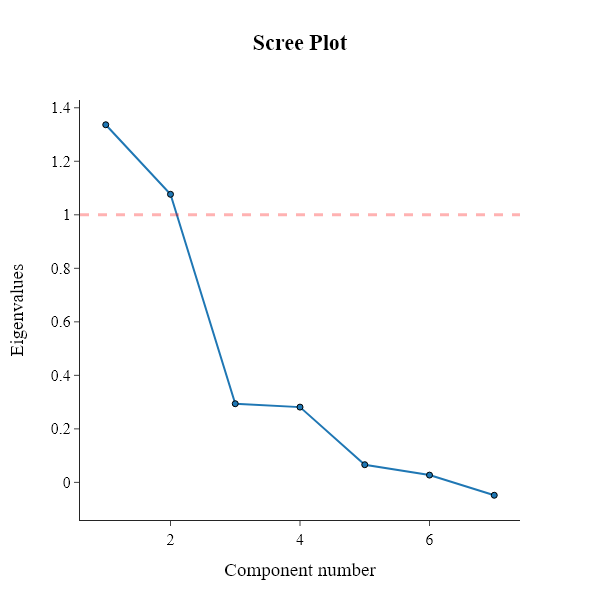

In [55]:
Other_plots.scree_plot(fitted_fa=FA)

$\text{We should choose only these components for which eigenvalue is greater than 1.}$<p>
$\text{Based on our scree plot optimal number of components is 2.}$

<h2>Kaiser-Mayer-Olkina (KMO)<h2>

$\text{The Kaiser-Mayer-Olkin (KMO) index is an indicator (taking values in the range } \left[0,1\right] \text{) that compares partial correlation coefficients with bivariate correlation coefficients.}$<p>
$$KMO=\frac{\sum_{i\neq j}\sum_{j\neq i}{\rho\left(X_i,X_j\right)}^2}{\sum_{i\neq j}\sum_{j\neq i}{\rho\left(X_i,X_j\right)}^2+\sum_{i\neq j}\sum_{j\neq i}{a\left(X_i,X_j\right)}^2}$$
$\text{Where: } \rho\left(X_i,X_j\right) \text{ - correlation between } X_i \text{ and } X_j,$<p>
$a\left(X_i,X_j\right) \text{ - the partial correlation coefficient for the variable } X_i \text{ and } X_j.$<p>
$\text{The closer the KMO value is to 1, the stronger the basis for applying factor analysis.}$

In [56]:
Kaiser_Mayer_Olkin(X_classification_scaled_pca)

0.5151167008354498

$\text{The closer the KMO value is to 1, the stronger the basis for applying factor analysis.}$<p>
$\text{Value of KMO less than 0.6 is considered inadequate.}$<p>
$\text{In our case it is 0.515, so the factor analysis/PCA should not be applied.}$<p>

<h2>Bartlett Sphercity<h2>

$H_0:R=I \text{ correlation matrix is a unitary matrix.}$<p>
$H_1:R=I \text{ correlation matrix is not a unitary matrix.}$<p>
$$\chi^2=-\left(N-1-\frac{2\ast M-5}{6}\right)\times\log{\left(\det{\left(R\right)}\right)}~\chi^2\left(\alpha,\ \frac{M^2-M}{2}\right)$$
$\text{Where: } N \text{ - the number of observations,}$<p>
$M \text{ - the number of variables,}$<p>
$R \text{ - correlation matrix.}$<p>
$\text{The identity matrix consists of only ones on the diagonal of the matrix, that is, then the correlation between variables does not occur.}$<p>
$\text{For this reason, we care about rejecting the null hypothesis, because we want to explain as much of the variance as possible on the basis of the correlation between the variables.}$

In [57]:
test_statistic, pvalue = bartlett_sphercity(X_classification_scaled_pca)
print("Test Statistic: {}".format(np.round(test_statistic, 4)))
print("p_value: {}".format(np.round(pvalue, 4)))

Test Statistic: 3904.085
p_value: 0.0


$p\_value<\alpha \rightarrow \text{ we reject the null hypothesis in favour of } H_1$<p>
$\text{So based on bartlett sphercity test we should perform factor analysis, because correlation matrix is not identity matrix.}$

<h2>Singular Value Decomposition<h2>

$\text{SVD is a factorization of the input matrix A into three other matrices: } U, \ \Sigma, \ V.$<p>
$1. \textbf{ Scaling the dataset:}$<p>
$\text{Simmilarly to PCA, SVD is scale-sensitive, therefore we have to scale our data.}$<p>
$2. \textbf{ Creation of } U \text{ matrix:}$<p>
$\text{The } U \text{ matrix represent the matrix of eigenvectors of matrix } X\times X^T.$<p>
$3. \textbf{ Creation of } V \text{ matrix:}$<p>
$\text{The } V \text{ matrix represent the matrix of eigenvectors of matrix } X^T\times X.$<p>
$4. \textbf{ Creation of } \Sigma \text{ matrix:}$<p>
$\text{The } \Sigma \text{ matrix is a diagonal matrix whose values are the square toots of eigenvalues of the } U \text { or } V \text{ matrices in descending order.}$<p>
$5. \textbf{ Dataset transformation:}$<p>
$\text{We choose the number of components - } n\_components \text{ (the new reduced size of the dataset) and then take the first } n\_components \text{ of the columns from the } V^T \text{ matrix:}$<p>
$$X\_Transformed=X\times V^T\left[:,:\ n\_components\right]\$$

In [58]:
svd_algorithm = SVD(n_components=5, random_state=17)
svd_algorithm.fit(X_classification_scaled_pca)

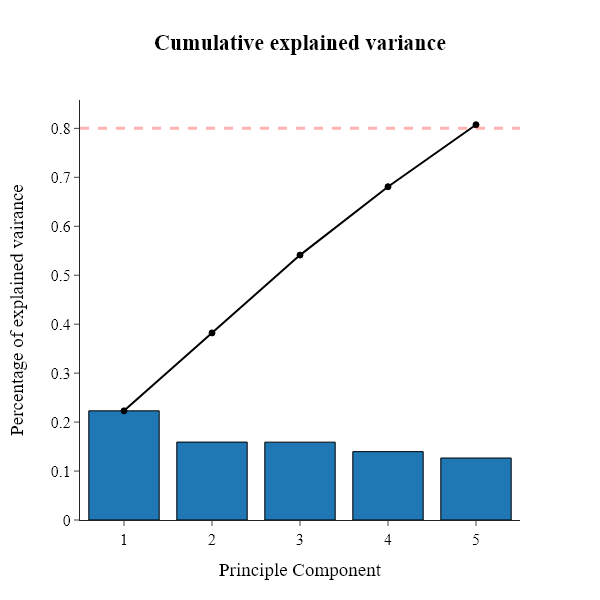

In [59]:
Other_plots.cumulative_explained_variance(fitted_pca=svd_algorithm)

$\text{As we can see explained variance by SVD is simmilar to explanation of variance by Linear PCA.}$

$\text{For data science projects good thing to do is comparision of cross validation results based on number of components selected.}$<p>
$\text{We can do that for PCA, KernelPCA or SVD.}$<p>
$\text{In this notebook we will show process for SVD with usage of LGBM Classifier.}$

In [60]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)
algorithm = LGBMClassifier(random_state=17)
X = X_classification.copy()
y = y_classification.copy()
list_of_continous = [feature for feature in X.columns.tolist() if feature not in list_of_categorical_classification]
for n_components in range(1, len(list_of_continous)+1):
    print("Number of components: {}".format(n_components))
    svd_algorithm = SVD(n_components=n_components, random_state=17)
    train_scores, valid_scores = [], []
    for iter, (train_idx, valid_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx, :], X.iloc[valid_idx, :]
        y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]
        continous_data_train = X_train.drop(list_of_categorical_classification, axis=1)
        continous_data_valid = X_valid.drop(list_of_categorical_classification, axis=1)
        X_train_continous_transformed = svd_algorithm.fit_transform(continous_data_train)
        X_valid_continous_transformed = svd_algorithm.transform(continous_data_valid)
        X_train_transformed = np.concatenate([X_train_continous_transformed, X_train[list_of_categorical_classification]], axis=1)
        X_valid_transformed = np.concatenate([X_valid_continous_transformed, X_valid[list_of_categorical_classification]], axis=1)
        algorithm.fit(X_train_transformed, y_train)
        y_train_prob = algorithm.predict_proba(X_train_transformed)[:, 1]
        y_valid_prob = algorithm.predict_proba(X_valid_transformed)[:, 1]
        train_scores.append(roc_auc_score(y_train, y_train_prob))
        valid_scores.append(roc_auc_score(y_valid, y_valid_prob))
    print("TRAIN: Mean roc auc score: {}".format(np.round(np.mean(train_scores), 4)))
    print("VALID: Mean roc auc score: {}".format(np.round(np.mean(valid_scores), 4)))

Number of components: 1


TRAIN: Mean roc auc score: 0.8651
VALID: Mean roc auc score: 0.7777
Number of components: 2
TRAIN: Mean roc auc score: 0.9595
VALID: Mean roc auc score: 0.9107
Number of components: 3
TRAIN: Mean roc auc score: 0.963
VALID: Mean roc auc score: 0.9124
Number of components: 4
TRAIN: Mean roc auc score: 0.9668
VALID: Mean roc auc score: 0.9137
Number of components: 5
TRAIN: Mean roc auc score: 0.972
VALID: Mean roc auc score: 0.9195
Number of components: 6
TRAIN: Mean roc auc score: 0.9744
VALID: Mean roc auc score: 0.9184
Number of components: 7
TRAIN: Mean roc auc score: 0.9756
VALID: Mean roc auc score: 0.9176


$\text{We can also plot the results.}$

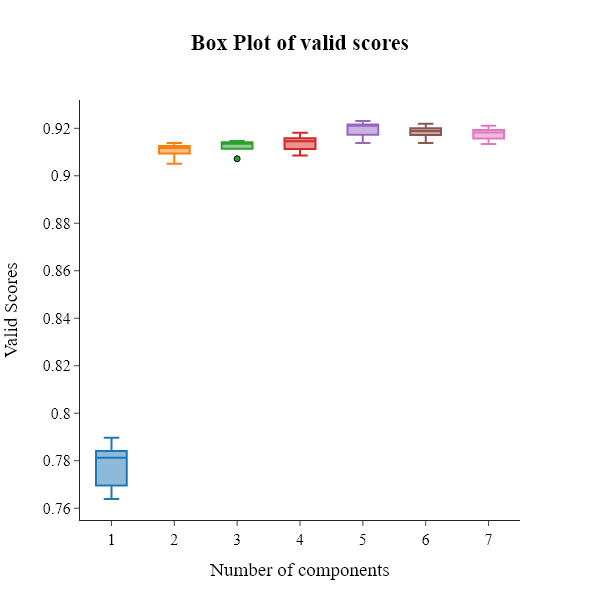

In [61]:
Other_plots.cross_validation_components(X=X_classification, y=y_classification, list_of_categorical=list_of_categorical_classification, reduction_algorithm=SVD(n_components=5, random_state=17), predictive_algorithm=LGBMClassifier(random_state=17), cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=17), random_state=17)

$\text{As we can see reduction dimension to 5 from 7 for continous features improved results!}$

<h3>Advantages and disadvantages of SVD<h3>

$\text{Advantages of SVD:}$<p>
$\text{- Relatively simpler interpretation than PCA, since the algorithm is based only on the eigenvalues from the input matrix (rather than, as with PCA, on the eigenvectors of the covariance matrix),}$<p>
$\text{- It identifies hidden (latent) factors in the data better than PCA.}$<p><br>

$\text{Disadvantages of SVD:}$<p>
$\text{- Like PCA, it is a linear algorithm by which it does not handle non-linear relationships in the dataset very well,}$<p>
$\text{- It is sensitive to scale and outliers.}$

<h2>t-Distributed Stochastic Neighbor Embedding<h2>

$\text{t-Distributed Stochastic Neighbor Embedding is an unsupervised machine learning algorithm used to reduce dimensionality for a nonlinear dataset.}$<p>
$\text{Unlike PCA, which is a linear method that focuses on preserving the maximum variance of the set, t-SNE better preserves the internal structure of the data (especially nonlinear data).}$<p><br>
$\text{1. For input data } X \text{, we calculate pairwise similarities in the original multivariate space.}$<p>
$\text{Put simply: for each observation } i \text{, we calculate the probability that } i \text{ will choose observation } j \text{ as its neighbor.}$<p>
$\text{These probabilities are calculated using a normalized normal distribution centered around the points:}$<p>
$$P\left(X_j\middle| X_i\right)=\frac{e^{-\frac{1}{2}\times\frac{\left|\left|X_i-X_j\right|\right|^2}{\sigma^2}}}{\sum_{k\neq i}^{N}e^{-\frac{1}{2}\times\frac{\left|\left|X_i-X_k\right|\right|^2}{\sigma^2}}}\ $$
$\text{Where: } N \text{ - the number of observations in the dataset.}$<p>
$\text{The resulting matrix will have a size of } \left[N,N\right] \text{, where we will have 0 on the diagonal } (i=j).$<p>
$\text{The value of } \sigma \text{ is determined for each observation based on the user-specified complexity of the distributions (perplexity).}$<p><br>
$\text{2. In this step, we will focus on determining the value of perplexity.}$<p>
$\text{Perplexity can also be seen as our opinion of the density of the data.}$<p>
$\text{Due to the difficulty of estimating analytically the appropriate value of this parameter, it is useful to carry out tuning (usually between 5 and 50).}$<p>
$\text{For TSNE, perplexity is determined by the formula:}$<p>
$$Perplexity\left(P\left(X_j\middle| X_i\right)\right)=2^{H\left(P\left(X_j\middle| X_i\right)\right)}$$
$\text{Where: } H\left(P_i\right) \text{ - Shannon entropy probability } P_i.$<p>
$$H\left(P\left(X_j\middle| X_i\right)\right)=-\sum_{j=1}^{N}{P\left(X_j\middle| X_i\right)\times\log_2{\left(P\left(X_j\middle| X_i\right)\right)}}$$
$\text{Thus, we will want to find such values of } \sigma \text{ for which } Perplexity\left(P\left(X_j\middle| X_i\right)\right) \text{ (determined for the input data) will be as close as possible to this user-specified Perplexity.}$<p>
$\text{We will use a simple binary algorithm to determine these values:}$<p>
$\text{1) We determine the upper and lower limits: }$<p>
$$upper=std\left(\left|\left|X_i-X_j\right|\right|^2\right)\times100$$
$$lower=std\left(\left|\left|X_i-X_j\right|\right|^2\right)\times0.001$$
$\text{2) We determine the current value of } \sigma_{guess} \text{ which is the average of upper and lower:}$
$$\sigma_{guess}=\frac{upper+lower}{2}$$
$\text{3) If for a given } \sigma_{guess}:$<p>
$- Peprlexity\left(P\left(X_j\middle| X_i\right)\right)>Perplexity:$
$$upper=\sigma_{guess}$$
$- Peprlexity\left(P\left(X_j\middle| X_i\right)\right)>Perplexity:$
$$lower=\sigma_{guess}$$
$- \left|Peprlexity\left(P\left(X_j\middle| X_i\right)\right)-Perplexity\right|<tolerance$
$$\sigma=\sigma_{guess}$$
$\text{3. Since we are calculating a composite probability distribution rather than a conditional distribution for the TSNE algorithm, then:}$
$$P\left(X_i,X_j\right)=\frac{\left(P\left(X_j\middle| X_i\right)\right)+\left(P\left(X_i\middle| X_j\right)\right)}{2\times N}$$
$\text{4. Already knowing how similarities between data in the original multidimensional input set are determined, we will want to do the same for our new low-dimensional space.}$<p>
$\text{In this way, we will be able to make sure that the data that are close together in the original space are also close together in its projection.}$<p>
$\text{The determination is very similar to the previous one, except that now we will use a Student's t-distribution with one degree of freedom instead of the Gauss distribution.}$<p>
$$Q\left(X_i,X_j\right)=\frac{\left(1+\left|\left|y_i-y_j\right|\right|^2\right)^{-1}}{\sum_{k\neq i}^{N}\left(1+\left|\left|y_k-y_i\right|\right|^2\right)^{-1}}$$
$\text{We initialize the y variable as random values from a normal distribution with size } \left[N,\ new\_dimension\right].$
$\text{5. The cost function for TSNE is the Kullback-Leibler divergence between joint probability distributions in high-dimensional and low-dimensional space:}$
$$J=\sum_{i=1}^{N}\sum_{j=1}^{N}{P\left(X_i,X_j\right)\times\log{\left(\frac{P\left(X_i,X_j\right)}{Q\left(X_i,X_j\right)}\right)}}$$
$\text{Our goal is to minimize the difference in the matrices } P\left(X_i,X_j\right)  \text{ and } Q\left(X_i,X_j\right)  \text{ while preserving the "neighborhood" structure of the original space.}$<p>
$\text{The optimization problem is solved using the gradient method:}$
$$\frac{\partial J}{\partial y_i}=4\times\sum_{j=1}^{N}{\left(P\left(X_i,X_j\right)-Q\left(X_i,X_j\right)\right)\times\left(1+\left|\left|y_i-y_j\right|\right|^2\right)^{-1}\times\left(y_i-y_j\right)}$$
$\text{6. Updating the y-value is done in the classic way using } learning\_rate$
$$y_{new}=y_{old}-learning\_rate\times\frac{\partial J}{\partial y_i}$$

In [62]:
tsne_algorithm = TSNE(n_components=2, perplexity=10, learning_rate=500, n_iter=300, tolerance=1e-5, early_exaggeration=1, random_state=17)
X_transformed = tsne_algorithm.fit_transform(data=X_classification_scaled_pca, verbose=True)

Epoch: 1, Loss: 6.365953555214868
Epoch: 50, Loss: 5.892159005207244
Epoch: 100, Loss: 4.4757498988154065
Epoch: 150, Loss: 3.94019367643173
Epoch: 200, Loss: 3.6186620186275236
Epoch: 250, Loss: 3.397299890603406


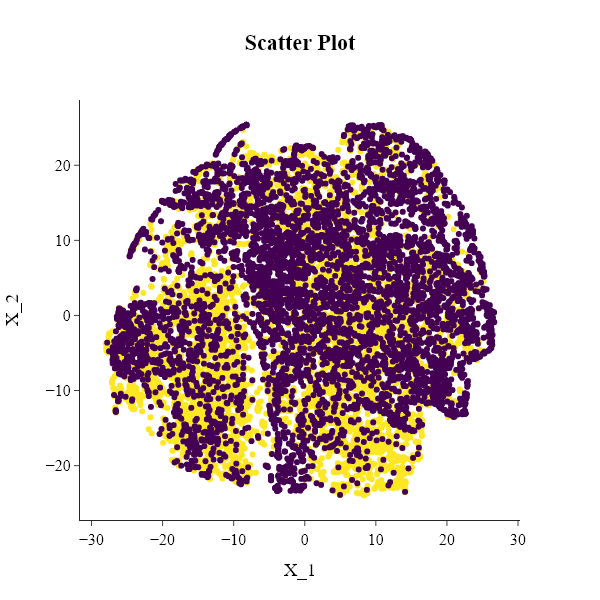

In [63]:
Other_plots.scatter_plot(X=X_transformed, y=y_classification)

<h3>Advantages and disadvantages of TSNE<h3>

$\text{Advantages of TSNE:}$<p>
$\text{- Preserves local neighborhoods, which means that the input data will also be close to each other in the transformed space,}$<p>
$\text{- Does not assume linear relationships between data. Performs better than PCA and SVD for nonlinear data.}$<p><br>

$\text{Disadvantages of TSNE:}$<p>
$\text{- Time-consuming process by, among other things, calculating the distance between all observations, or gradient optimization,}$<p>
$\text{- Sensitivity to parameters, especially perplexity, which is difficult to determine analytically.}$

<h2>Non-Negative Matrix Factorization<h2>

$\text{Non-Negative Matrix Factorization (NNMF) is an unsupervised technique that factorizes a multidimensional space into a lower representation.}$<p>
$\text{Non-negative factorization uses a factor analysis method to give relatively less weight to words with less coherence.}$<p>
$\text{NNMF uses the original input matrix to determine the matrix } W \text{ (themes found) and } H \text{ (coefficients/weights for each theme).}$<p>
$\text{Thus, assuming that the input matrix } X \text{ contains } N \text{ documents and } M \text{ unique words, and the final number of topics we want to obtain is } R \text{, then:}$<p>
$\text{- } X \text{ is of size } \left[N,M\right],$<p>
$\text{- } W \text{ is of size } \left[N,R\right],$<p>
$\text{- } H \text{ is of size } \left[R,M\right].$<p>
$\text{The main goal of the NNMF is to minimize the distance between } X \text{ and } W\times H \text{ while preserving the non-negativity of } W \text{ and } H.$<p>
$\text{The nonnegativity constraint of the two matrices is therefore the primary constraint in finding these matrices.}$<p>
$$minimize\ \left|\left|X-W\times H\right|\right|^2\ w.r.t\ W>0\land H>0$$
$\text{A popular algorithm with which we can find optimal matrix values is SGD (Stochastic Gradient Descent).}$<p><br>
$\text{1. FThe loss function for NMF is:}$<p>
$$L\left(W,H\right)=0.5\times\left|\left|X-W\times H\right|\right|^2+$$
$$+alpha_W\times l1\_ratio\times M\times\left|\left|W\right|\right|+$$
$$+alpha_H\times l1\_ratio\times N\times\left|\left|H\right|\right|+$$
$$+0.5\times alpha_W\times\left(1-l1\_ratio\right)\times M\times\left|\left|W\right|\right|^2+$$
$$+0.5\times alpha_H\times\left(1-l1\_ratio\right)\times N\times\left|\left|H\right|\right|^2$$
$\text{Where: } alpha_W,\ alpha_H,\ l1\_ratio \text{ - user-determined constants,}$<p>
$\left|\left|W\right|\right|=\sum_{i=1}^{N}\left|W_i\right|,$<p>
$\left|\left|W\right|\right|^2=\sum_{i=1}^{N}{W_i}^2.$<p><br>
$\text{2. Determination of gradients of loss functions:}$<p>
$$L\left(W,H\right)=0.5\times\left|\left|X\ -W\times H\right|\right|^2+$$
$$+alpha_W\times l1\_ratio\times M\times\left|\left|W\right|\right|+$$
$$+alpha_H\times l1\_ratio\times N\times\left|\left|H\right|\right|+$$
$$+0.5\times alpha_W\times\left(1-l1\_ratio\right)\times M\times\left|\left|W\right|\right|^2+$$
$$+0.5\times alpha_H\times\left(1-l1\_ratio\right)\times N\times\left|\left|H\right|\right|^2$$
$$L\left(W,H\right)=0.5\times\left(X-W\times H\right)^2+$$
$$+alpha_W\times l1\_ratio\times M\times W+$$
$$+alpha_H\times l1\_ratio\times N\times H+$$
$$+0.5\times alpha_W\times\left(1-l1\_ratio\right)\times M\times W+$$
$$+0.5\times alpha_H\times\left(1-l1\_ratio\right)\times N\times H$$
$$\frac{\partial L\left(W,H\right)}{\partial W}=0.5\times\left(-2\times X\times H+2\times W\times H^2\right)+$$
$$+alpha_W\times l1\_ratio\times M+2\times0.5\times alpha_W\times\left(1-l1\_ratio\right)\times M\times W$$
$$\frac{\partial L\left(W,H\right)}{\partial H}=0.5\times\left(-2\times X\times W+2\times W^2\times H\right)+$$
$$+alpha_H\times l1\_ratio\times N+2\times0.5\times alpha_H\times\left(1-l1\_ratio\right)\times N\times H$$
$\text{3. Update of matrices:}$<p>
$$W=W-learning\_rate\times\frac{\partial L\left(W,H\right)}{\partial W}$$
$$H=H-learning\_rate\times\frac{\partial L\left(W,H\right)}{\partial H}$$
$\text{4. Each time after updating the matrices, we have to make sure they contain non-negative values.}$<p>
$\text{This can be done by inserting 0 in places for which the values were negative.}$

In [64]:
nnmf_algorithm = NNMF(n_components=2, max_iter=300, learning_rate=0.001, alpha_W=0, alpha_H=0, l1_ratio=0, random_state=17)
X_transformed = nnmf_algorithm.fit_transform(data=X_classification_scaled_pca, verbose=True)

Epoch: 1, Loss: 39066.927485824766
Epoch: 50, Loss: 37701.86279452294
Epoch: 100, Loss: 27387.43287250422
Epoch: 150, Loss: 27209.632824548917
Epoch: 200, Loss: 27206.54439581941
Epoch: 250, Loss: 27206.498269914315
Epoch: 300, Loss: 27206.497234021605


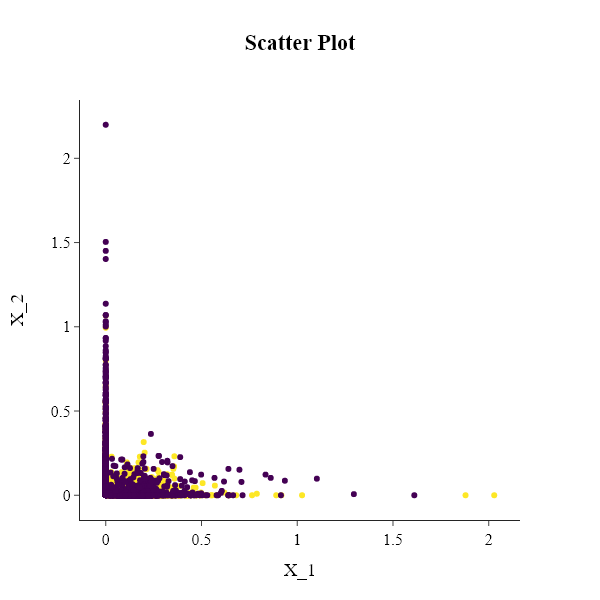

In [65]:
Other_plots.scatter_plot(X=X_transformed, y=y_classification)

<h3>Advantages and disadvantages of NNMF<h3>

$\text{Advantages of NNMF:}$<p>
$\text{- Works well with relatively small data sets, such as tweets or titles,}$<p>
$\text{- The non-negativity condition can lead to better results, especially when analyzing images, or texts, where data is generally non-negative.}$<p><br>

$\text{Disadvantages of NNMF:}$<p>
$\text{- Large number of parameters to optimize, on which later results depend,}$<p>
$\text{- Problem with initialization of matrices W and H. At the stage of updating them, it may be that they are quickly assigned 0 to some values that are unlikely to be modified despite other optimal values that should occur in their place.}$